In [1]:
%pip install supervision
%pip -q install roboflow
%pip -q install ultralytics==8.0.28


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 357.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset_location = "/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3"

Mounted at /content/drive


In [3]:
import supervision as sv



In [4]:
from ultralytics import YOLO
from PIL import Image
def predict_img(img_path, model_path):

  model = YOLO(model_path)
  source = img_path

  results = model(source)
  for r in results:
    try:
      return r.boxes.xywhn.cpu().numpy()[0]
    except Exception as e:
      return [0,0,0,0]

In [5]:
def calcula_iou_numpy(predict, label):
    # caixa1 e caixa2 devem ser arrays NumPy no formato [x, y, largura, altura]
    x1, y1, w1, h1 = predict
    try:
      id2, x2, y2, w2, h2 = label
    except Exception as e:
      id2, x2, y2, w2, h2 = label[0]

    # Calcula as coordenadas dos cantos da interseção
    x_intersecao = max(x1, x2)
    y_intersecao = max(y1, y2)
    largura_intersecao = min(x1 + w1, x2 + w2) - x_intersecao
    altura_intersecao = min(y1 + h1, y2 + h2) - y_intersecao

    # Verifica se há interseção
    if largura_intersecao <= 0 or altura_intersecao <= 0:
        return 0.0

    # Calcula a área da interseção e da união
    area_intersecao = largura_intersecao * altura_intersecao
    area_uniao = w1 * h1 + w2 * h2 - area_intersecao

    # Calcula o IoU
    iou = area_intersecao / area_uniao

    return iou

In [ ]:
import os
import numpy as np
from statistics import mean
source = ['/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid']



for filepath in source:
  yolo_s = []
  yolo_m = []
  yolo_n = []
  yolo_l = []
  yolo_x = []

  for filename in os.listdir(f"{filepath}/labels"):
      labels = np.loadtxt(os.path.join(f"{filepath}/labels", filename))
      images = os.path.join(f"{filepath}/images", filename).split('.txt')[0] + '.jpg'
      print(images)

      predict_s = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/weights/best.pt')
      print(predict_s)
      yolo_s.append(calcula_iou_numpy(predict_s, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/inferencias/{filename}", 'a') as file:
       file.write(str(predict_s))

      predict_m = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/weights/best.pt')
      yolo_m.append(calcula_iou_numpy(predict_m, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/inferencias/{filename}", 'a') as file:
        file.write(str(predict_m))

      predict_n = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/weights/best.pt')
      yolo_n.append(calcula_iou_numpy(predict_n, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/inferencias/{filename}", 'a') as file:
        file.write(str(predict_n))

      predict_l = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/weights/best.pt')
      yolo_l.append(calcula_iou_numpy(predict_l, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/inferencias/{filename}", 'a') as file:
        file.write(str(predict_l))

      predict_x = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/weights/best.pt')
      yolo_x.append(calcula_iou_numpy(predict_x, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/inferencias/{filename}", 'a') as file:
        file.write(str(predict_x))

  with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/iou_{filepath.split('/')[5]}.txt", 'w') as file:
        file.write(str(mean(yolo_x)))

  with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/iou_{filepath.split('/')[5]}.txt", 'w') as file:
        file.write(str(mean(yolo_m)))

  with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/iou_{filepath.split('/')[5]}.txt", 'w') as file:
        file.write(str(mean(yolo_l)))

  with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/iou_{filepath.split('/')[5]}.txt", 'w') as file:
        file.write(str(mean(yolo_n)))

  with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/iou_{filepath.split('/')[5]}.txt", 'w') as file:
        file.write(str(mean(yolo_s)))


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0090_jpg.rf.b7f5fa070f57dc6c249b5e8e8dc0ad92.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0090_jpg.rf.b7f5fa070f57dc6c249b5e8e8dc0ad92.jpg: 640x640 1 Tumor, 18.4ms
Speed: 0.6ms pre-process, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.30208     0.68437       0.325     0.36875]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0090_jpg.rf.b7f5fa070f57dc6c249b5e8e8dc0ad92.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0090_jpg.rf.b7f5fa070f57dc6c249b5e8e8dc0ad92.jpg: 640x640 1 Tumor, 13.2ms
Speed: 1.7ms pre-process, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0123_jpg.rf.32819e9ff96c7367d389575603c68af4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0123_jpg.rf.32819e9ff96c7367d389575603c68af4.jpg: 640x640 1 Tumor, 18.4ms
Speed: 0.6ms pre-process, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.64746     0.39453     0.16211     0.16016]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0123_jpg.rf.32819e9ff96c7367d389575603c68af4.jpg: 640x640 1 Tumor, 25.8ms
Speed: 0.7ms pre-process, 25.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0123_jpg.rf.32819e9ff96c7367d389575603c68af4.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.7ms pre-process, 16.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0185_jpg.rf.f13dd079ba2c01de7558415ae27c9aa5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0185_jpg.rf.f13dd079ba2c01de7558415ae27c9aa5.jpg: 640x640 13.3ms
Speed: 0.5ms pre-process, 13.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0185_jpg.rf.f13dd079ba2c01de7558415ae27c9aa5.jpg: 640x640 1 Tumor, 23.8ms
Speed: 0.6ms pre-process, 23.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0185_jpg.rf.f13dd079ba2c01de7558415ae27c9aa5.jpg: 640x640 1 Tumor, 11.7ms
Speed: 0.5ms pre-process, 11.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/52_jpg.rf.807887b7f1bd325d745420a0efabd166.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/52_jpg.rf.807887b7f1bd325d745420a0efabd166.jpg: 640x640 1 Tumor, 15.3ms
Speed: 0.5ms pre-process, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.29241     0.52009     0.23661     0.19196]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/52_jpg.rf.807887b7f1bd325d745420a0efabd166.jpg: 640x640 1 Tumor, 22.7ms
Speed: 0.5ms pre-process, 22.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/52_jpg.rf.807887b7f1bd325d745420a0efabd166.jpg: 640x640 1 Tumor, 12.7ms
Speed: 0.5ms pre-process, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/52_jpg.rf.807887

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/97_jpg.rf.8a67354263b00ae725400ada358d49de.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/97_jpg.rf.8a67354263b00ae725400ada358d49de.jpg: 640x640 31.9ms
Speed: 0.6ms pre-process, 31.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/97_jpg.rf.8a67354263b00ae725400ada358d49de.jpg: 640x640 54.6ms
Speed: 0.5ms pre-process, 54.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/97_jpg.rf.8a67354263b00ae725400ada358d49de.jpg: 640x640 12.5ms
Speed: 0.5ms pre-process, 12.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/97_jpg.rf.8a67354263b00ae725400ada

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0119_jpg.rf.3ebd6c7877b3ae3659215ccf85fd0fcc.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0119_jpg.rf.3ebd6c7877b3ae3659215ccf85fd0fcc.jpg: 640x640 1 Tumor, 12.3ms
Speed: 0.5ms pre-process, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.44531     0.43066     0.12891     0.15039]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0119_jpg.rf.3ebd6c7877b3ae3659215ccf85fd0fcc.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0119_jpg.rf.3ebd6c7877b3ae3659215ccf85fd0fcc.jpg: 640x640 1 Tumor, 19.1ms
Speed: 0.6ms pre-process, 19.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/66_jpg.rf.bcf961d8cdca6687b8df276e34d362a9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/66_jpg.rf.bcf961d8cdca6687b8df276e34d362a9.jpg: 640x640 1 Tumor, 12.5ms
Speed: 0.6ms pre-process, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.60714     0.65179     0.27679     0.34821]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/66_jpg.rf.bcf961d8cdca6687b8df276e34d362a9.jpg: 640x640 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/66_jpg.rf.bcf961d8cdca6687b8df276e34d362a9.jpg: 640x640 1 Tumor, 12.3ms
Speed: 0.5ms pre-process, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/66_jpg.rf.bcf961

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0068_jpg.rf.70403ce9a7176ee823eebc23af3e5c45.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0068_jpg.rf.70403ce9a7176ee823eebc23af3e5c45.jpg: 640x640 1 Tumor, 11.9ms
Speed: 0.5ms pre-process, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.53249     0.32401     0.38267     0.36282]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0068_jpg.rf.70403ce9a7176ee823eebc23af3e5c45.jpg: 640x640 1 Tumor, 23.8ms
Speed: 0.6ms pre-process, 23.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0068_jpg.rf.70403ce9a7176ee823eebc23af3e5c45.jpg: 640x640 1 Tumor, 11.6ms
Speed: 0.6ms pre-process, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0125_jpg.rf.cb1fcd9ada7fb93494dd725271e7db8f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0125_jpg.rf.cb1fcd9ada7fb93494dd725271e7db8f.jpg: 640x640 1 Tumor, 15.2ms
Speed: 0.6ms pre-process, 15.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.41211     0.68652    0.097656     0.12305]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0125_jpg.rf.cb1fcd9ada7fb93494dd725271e7db8f.jpg: 640x640 1 Tumor, 28.7ms
Speed: 0.6ms pre-process, 28.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0125_jpg.rf.cb1fcd9ada7fb93494dd725271e7db8f.jpg: 640x640 1 Tumor, 12.6ms
Speed: 0.5ms pre-process, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/4_jpg.rf.efcebc91a9367c2bb61775b61841b245.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/4_jpg.rf.efcebc91a9367c2bb61775b61841b245.jpg: 640x640 1 Tumor, 12.4ms
Speed: 0.6ms pre-process, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.69866     0.43304     0.41518     0.38393]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/4_jpg.rf.efcebc91a9367c2bb61775b61841b245.jpg: 640x640 1 Tumor, 19.2ms
Speed: 0.5ms pre-process, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/4_jpg.rf.efcebc91a9367c2bb61775b61841b245.jpg: 640x640 1 Tumor, 19.8ms
Speed: 1.0ms pre-process, 19.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/4_jpg.rf.efcebc91a

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0021_jpg.rf.2e547a507ded035f4dbc75796b477410.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0021_jpg.rf.2e547a507ded035f4dbc75796b477410.jpg: 640x640 1 Tumor, 12.9ms
Speed: 0.6ms pre-process, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.35027     0.38514     0.29947     0.28919]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0021_jpg.rf.2e547a507ded035f4dbc75796b477410.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.5ms pre-process, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0021_jpg.rf.2e547a507ded035f4dbc75796b477410.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0188_jpg.rf.f651cd430bd9aedf683c26c7ded0ecfc.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0188_jpg.rf.f651cd430bd9aedf683c26c7ded0ecfc.jpg: 640x640 1 Tumor, 42.0ms
Speed: 0.7ms pre-process, 42.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


[     0.5791     0.62793     0.12695     0.12305]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0188_jpg.rf.f651cd430bd9aedf683c26c7ded0ecfc.jpg: 640x640 1 Tumor, 42.5ms
Speed: 4.4ms pre-process, 42.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0188_jpg.rf.f651cd430bd9aedf683c26c7ded0ecfc.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.6ms pre-process, 21.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 16

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0127_jpg.rf.64b8e362473f8298614d0eb82dd28c48.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0127_jpg.rf.64b8e362473f8298614d0eb82dd28c48.jpg: 640x640 1 Tumor, 53.9ms
Speed: 0.7ms pre-process, 53.9ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.65137      0.4248     0.26758     0.30273]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0127_jpg.rf.64b8e362473f8298614d0eb82dd28c48.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0127_jpg.rf.64b8e362473f8298614d0eb82dd28c48.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 16

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0122_jpg.rf.2bd587d9eb18d1653957d02f06b8c655.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0122_jpg.rf.2bd587d9eb18d1653957d02f06b8c655.jpg: 640x640 1 Tumor, 42.3ms
Speed: 0.6ms pre-process, 42.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.69629     0.58691    0.080078    0.083984]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0122_jpg.rf.2bd587d9eb18d1653957d02f06b8c655.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0122_jpg.rf.2bd587d9eb18d1653957d02f06b8c655.jpg: 640x640 11.9ms
Speed: 0.5ms pre-process, 11.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOP

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/80_jpg.rf.a03a8a5066a580f2b5213c28ee535aa7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/80_jpg.rf.a03a8a5066a580f2b5213c28ee535aa7.jpg: 640x640 1 Tumor, 12.6ms
Speed: 0.5ms pre-process, 12.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.8683     0.57589     0.18304     0.17857]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/80_jpg.rf.a03a8a5066a580f2b5213c28ee535aa7.jpg: 640x640 1 Tumor, 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/80_jpg.rf.a03a8a5066a580f2b5213c28ee535aa7.jpg: 640x640 1 Tumor, 11.4ms
Speed: 0.5ms pre-process, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/80_jpg.rf.a03a8a

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/6_jpg.rf.25a0b581f25a931362d9b90f62f07637.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/6_jpg.rf.25a0b581f25a931362d9b90f62f07637.jpg: 640x640 1 Tumor, 12.5ms
Speed: 0.5ms pre-process, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.72991     0.55134     0.15625     0.12946]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/6_jpg.rf.25a0b581f25a931362d9b90f62f07637.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/6_jpg.rf.25a0b581f25a931362d9b90f62f07637.jpg: 640x640 1 Tumor, 13.3ms
Speed: 0.5ms pre-process, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/6_jpg.rf.25a0b581f

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0104_jpg.rf.be1cb11893923288ff4f6b3cf1450e64.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0104_jpg.rf.be1cb11893923288ff4f6b3cf1450e64.jpg: 640x576 1 Tumor, 20.2ms
Speed: 0.7ms pre-process, 20.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.25822     0.38819     0.37559     0.34599]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0104_jpg.rf.be1cb11893923288ff4f6b3cf1450e64.jpg: 640x576 1 Tumor, 24.5ms
Speed: 0.5ms pre-process, 24.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0104_jpg.rf.be1cb11893923288ff4f6b3cf1450e64.jpg: 640x576 1 Tumor, 14.9ms
Speed: 0.6ms pre-process, 14.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 16

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0058_jpg.rf.f807f1688485e6d2f02f97d7d502873a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0058_jpg.rf.f807f1688485e6d2f02f97d7d502873a.jpg: 448x640 1 Tumor, 12.3ms
Speed: 0.4ms pre-process, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.62868     0.46014     0.11938     0.20501]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0058_jpg.rf.f807f1688485e6d2f02f97d7d502873a.jpg: 448x640 1 Tumor, 25.1ms
Speed: 0.5ms pre-process, 25.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0058_jpg.rf.f807f1688485e6d2f02f97d7d502873a.jpg: 448x640 1 Tumor, 11.9ms
Speed: 0.4ms pre-process, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0083_jpg.rf.e98681653813c9f8b239311abd19354f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0083_jpg.rf.e98681653813c9f8b239311abd19354f.jpg: 608x640 19.9ms
Speed: 0.6ms pre-process, 19.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0083_jpg.rf.e98681653813c9f8b239311abd19354f.jpg: 608x640 1 Tumor, 18.8ms
Speed: 0.5ms pre-process, 18.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0083_jpg.rf.e98681653813c9f8b239311abd19354f.jpg: 608x640 1 Tumor, 13.4ms
Speed: 0.5ms pre-process, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0024_jpg.rf.6506cc275f2541336020608a49aa4715.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0024_jpg.rf.6506cc275f2541336020608a49aa4715.jpg: 448x640 1 Tumor, 19.0ms
Speed: 0.5ms pre-process, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.6254     0.24113      0.1873     0.26005]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0024_jpg.rf.6506cc275f2541336020608a49aa4715.jpg: 448x640 1 Tumor, 18.4ms
Speed: 0.5ms pre-process, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0024_jpg.rf.6506cc275f2541336020608a49aa4715.jpg: 448x640 1 Tumor, 14.6ms
Speed: 0.5ms pre-process, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0130_jpg.rf.b5435edd748b2a979c172ed90385c85a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0130_jpg.rf.b5435edd748b2a979c172ed90385c85a.jpg: 640x640 12.0ms
Speed: 0.5ms pre-process, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0130_jpg.rf.b5435edd748b2a979c172ed90385c85a.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0130_jpg.rf.b5435edd748b2a979c172ed90385c85a.jpg: 640x640 1 Tumor, 12.4ms
Speed: 0.5ms pre-process, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0205_jpg.rf.1e74d1e54701fd466a209a0e1874697b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0205_jpg.rf.1e74d1e54701fd466a209a0e1874697b.jpg: 640x640 1 Tumor, 14.0ms
Speed: 0.5ms pre-process, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.34961     0.37109     0.23047     0.21094]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0205_jpg.rf.1e74d1e54701fd466a209a0e1874697b.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.6ms pre-process, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0205_jpg.rf.1e74d1e54701fd466a209a0e1874697b.jpg: 640x640 1 Tumor, 20.7ms
Speed: 0.6ms pre-process, 20.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0030_jpg.rf.55d35161f240cd643c0617d954806ed9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0030_jpg.rf.55d35161f240cd643c0617d954806ed9.jpg: 640x544 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.77183     0.61881     0.21825     0.22772]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0030_jpg.rf.55d35161f240cd643c0617d954806ed9.jpg: 640x544 1 Tumor, 22.3ms
Speed: 0.5ms pre-process, 22.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0030_jpg.rf.55d35161f240cd643c0617d954806ed9.jpg: 640x544 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0133_jpg.rf.a7fab3b4b2bc2fa55db499e7320044fa.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0133_jpg.rf.a7fab3b4b2bc2fa55db499e7320044fa.jpg: 640x640 1 Tumor, 12.6ms
Speed: 0.5ms pre-process, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.65234     0.40234     0.23438     0.23438]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0133_jpg.rf.a7fab3b4b2bc2fa55db499e7320044fa.jpg: 640x640 1 Tumor, 22.2ms
Speed: 0.6ms pre-process, 22.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0133_jpg.rf.a7fab3b4b2bc2fa55db499e7320044fa.jpg: 640x640 1 Tumor, 11.6ms
Speed: 0.5ms pre-process, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0049_jpg.rf.6da8a7281ded00966a5212cbc6aabcac.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0049_jpg.rf.6da8a7281ded00966a5212cbc6aabcac.jpg: 640x512 1 Tumor, 14.3ms
Speed: 0.6ms pre-process, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.32428     0.19084     0.22045     0.16794]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0049_jpg.rf.6da8a7281ded00966a5212cbc6aabcac.jpg: 640x512 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0049_jpg.rf.6da8a7281ded00966a5212cbc6aabcac.jpg: 640x512 1 Tumor, 12.9ms
Speed: 0.5ms pre-process, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/90_jpg.rf.71d90644e2baef8512f8bac2435fd97a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/90_jpg.rf.71d90644e2baef8512f8bac2435fd97a.jpg: 640x640 3 Tumors, 11.6ms
Speed: 0.5ms pre-process, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66071     0.63616        0.25     0.17411]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/90_jpg.rf.71d90644e2baef8512f8bac2435fd97a.jpg: 640x640 1 Tumor, 20.7ms
Speed: 0.6ms pre-process, 20.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/90_jpg.rf.71d90644e2baef8512f8bac2435fd97a.jpg: 640x640 1 Tumor, 13.1ms
Speed: 0.5ms pre-process, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/90_jpg.rf.71d906

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0047_jpg.rf.210ad1db0c8c301fcb91e0481a019600.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0047_jpg.rf.210ad1db0c8c301fcb91e0481a019600.jpg: 640x608 1 Tumor, 14.9ms
Speed: 0.5ms pre-process, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.75219     0.19755     0.19825     0.16621]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0047_jpg.rf.210ad1db0c8c301fcb91e0481a019600.jpg: 640x608 1 Tumor, 38.2ms
Speed: 0.5ms pre-process, 38.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0047_jpg.rf.210ad1db0c8c301fcb91e0481a019600.jpg: 640x608 1 Tumor, 17.6ms
Speed: 0.5ms pre-process, 17.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 16

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/40_jpg.rf.c74131df8a849524e942bea025021035.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/40_jpg.rf.c74131df8a849524e942bea025021035.jpg: 640x640 1 Tumor, 12.1ms
Speed: 0.6ms pre-process, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.64509      0.3125     0.18304     0.16071]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/40_jpg.rf.c74131df8a849524e942bea025021035.jpg: 640x640 1 Tumor, 18.1ms
Speed: 0.5ms pre-process, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/40_jpg.rf.c74131df8a849524e942bea025021035.jpg: 640x640 1 Tumor, 11.4ms
Speed: 0.5ms pre-process, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/40_jpg.rf.c74131

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0060_jpg.rf.af2f9da17b4794aa053cdf507ab52f37.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0060_jpg.rf.af2f9da17b4794aa053cdf507ab52f37.jpg: 640x608 1 Tumor, 13.1ms
Speed: 0.5ms pre-process, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.39862     0.33621     0.17051     0.18966]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0060_jpg.rf.af2f9da17b4794aa053cdf507ab52f37.jpg: 640x608 1 Tumor, 21.6ms
Speed: 0.6ms pre-process, 21.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/Te-me_0060_jpg.rf.af2f9da17b4794aa053cdf507ab52f37.jpg: 640x608 1 Tumor, 12.9ms
Speed: 0.5ms pre-process, 12.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/35_jpg.rf.642840e95cc79cc3f0bed3d7e9aa4236.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/35_jpg.rf.642840e95cc79cc3f0bed3d7e9aa4236.jpg: 640x640 1 Tumor, 12.9ms
Speed: 0.5ms pre-process, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.45312     0.41295     0.21875     0.22768]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/35_jpg.rf.642840e95cc79cc3f0bed3d7e9aa4236.jpg: 640x640 1 Tumor, 25.0ms
Speed: 0.5ms pre-process, 25.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/35_jpg.rf.642840e95cc79cc3f0bed3d7e9aa4236.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.6ms pre-process, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test/images/35_jpg.rf.642840

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0163_jpg.rf.71926b7ca487018f4ebd616295b2d418.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0163_jpg.rf.71926b7ca487018f4ebd616295b2d418.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.49219      0.4209    0.089844    0.087891]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0163_jpg.rf.71926b7ca487018f4ebd616295b2d418.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0163_jpg.rf.71926b7ca487018f4ebd616295b2d418.jpg: 640x640 1 Tumor, 14.1ms
Speed: 0.5ms pre-process, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0148_jpg.rf.1d10c5bf1dd63351b9b597e141c01ca5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0148_jpg.rf.1d10c5bf1dd63351b9b597e141c01ca5.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.7ms pre-process, 19.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


[    0.35156     0.66504    0.097656     0.11914]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0148_jpg.rf.1d10c5bf1dd63351b9b597e141c01ca5.jpg: 640x640 1 Tumor, 39.2ms
Speed: 0.6ms pre-process, 39.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0148_jpg.rf.1d10c5bf1dd63351b9b597e141c01ca5.jpg: 640x640 1 Tumor, 13.5ms
Speed: 0.6ms pre-process, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0038_jpg.rf.062153e785735dd37f08fd51a8b7fdbc.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0038_jpg.rf.062153e785735dd37f08fd51a8b7fdbc.jpg: 640x544 1 Tumor, 17.6ms
Speed: 0.7ms pre-process, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.45343     0.20482     0.22059     0.19277]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0038_jpg.rf.062153e785735dd37f08fd51a8b7fdbc.jpg: 640x544 1 Tumor, 36.1ms
Speed: 0.5ms pre-process, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0038_jpg.rf.062153e785735dd37f08fd51a8b7fdbc.jpg: 640x544 1 Tumor, 12.8ms
Speed: 0.5ms pre-process, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0157_jpg.rf.6ccb6674e8ec48a9778e0b87dcbd2d19.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0157_jpg.rf.6ccb6674e8ec48a9778e0b87dcbd2d19.jpg: 640x640 1 Tumor, 13.0ms
Speed: 0.6ms pre-process, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.47949     0.36523      0.1582     0.17188]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0157_jpg.rf.6ccb6674e8ec48a9778e0b87dcbd2d19.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.5ms pre-process, 37.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0157_jpg.rf.6ccb6674e8ec48a9778e0b87dcbd2d19.jpg: 640x640 1 Tumor, 19.8ms
Speed: 0.6ms pre-process, 19.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0161_jpg.rf.baad4574d8b0ad65745707e771732c8e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0161_jpg.rf.baad4574d8b0ad65745707e771732c8e.jpg: 640x640 1 Tumor, 13.2ms
Speed: 0.7ms pre-process, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.58203     0.59961    0.066406     0.10547]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0161_jpg.rf.baad4574d8b0ad65745707e771732c8e.jpg: 640x640 1 Tumor, 37.9ms
Speed: 0.6ms pre-process, 37.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0161_jpg.rf.baad4574d8b0ad65745707e771732c8e.jpg: 640x640 1 Tumor, 14.0ms
Speed: 0.6ms pre-process, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0181_jpg.rf.5f381537ff698999ffca7c1928ad7595.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0181_jpg.rf.5f381537ff698999ffca7c1928ad7595.jpg: 640x640 13.6ms
Speed: 0.6ms pre-process, 13.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0181_jpg.rf.5f381537ff698999ffca7c1928ad7595.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0181_jpg.rf.5f381537ff698999ffca7c1928ad7595.jpg: 640x640 1 Tumor, 19.5ms
Speed: 0.6ms pre-process, 19.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0175_jpg.rf.c215bc8f39b436cf865f856dfde62e39.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0175_jpg.rf.c215bc8f39b436cf865f856dfde62e39.jpg: 640x640 12.7ms
Speed: 0.7ms pre-process, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0175_jpg.rf.c215bc8f39b436cf865f856dfde62e39.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0175_jpg.rf.c215bc8f39b436cf865f856dfde62e39.jpg: 640x640 1 Tumor, 11.5ms
Speed: 0.5ms pre-process, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0065_jpg.rf.12e2dd8dd599649cb66ba9ccba4d16c9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0065_jpg.rf.12e2dd8dd599649cb66ba9ccba4d16c9.jpg: 640x544 1 Tumor, 13.6ms
Speed: 0.7ms pre-process, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.37136      0.4551     0.10194      0.1102]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0065_jpg.rf.12e2dd8dd599649cb66ba9ccba4d16c9.jpg: 640x544 1 Tumor, 36.2ms
Speed: 0.6ms pre-process, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0065_jpg.rf.12e2dd8dd599649cb66ba9ccba4d16c9.jpg: 640x544 1 Tumor, 13.5ms
Speed: 0.6ms pre-process, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/95_jpg.rf.7ff4a405d61740029bf3342ce35b7f8b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/95_jpg.rf.7ff4a405d61740029bf3342ce35b7f8b.jpg: 640x640 1 Tumor, 13.1ms
Speed: 0.7ms pre-process, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.57589     0.70312     0.23214     0.23661]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/95_jpg.rf.7ff4a405d61740029bf3342ce35b7f8b.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.5ms pre-process, 37.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/95_jpg.rf.7ff4a405d61740029bf3342ce35b7f8b.jpg: 640x640 1 Tumor, 12.1ms
Speed: 0.5ms pre-process, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0033_jpg.rf.0b4d9d9d02bd945a21fd755416eefb39.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0033_jpg.rf.0b4d9d9d02bd945a21fd755416eefb39.jpg: 640x640 1 Tumor, 13.4ms
Speed: 0.6ms pre-process, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.51715     0.21209     0.19314     0.18592]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0033_jpg.rf.0b4d9d9d02bd945a21fd755416eefb39.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0033_jpg.rf.0b4d9d9d02bd945a21fd755416eefb39.jpg: 640x640 1 Tumor, 19.6ms
Speed: 0.6ms pre-process, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0114_jpg.rf.f87bdf7ae7b23649d546324d11644054.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0114_jpg.rf.f87bdf7ae7b23649d546324d11644054.jpg: 640x640 1 Tumor, 13.0ms
Speed: 0.6ms pre-process, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.69231     0.44348     0.19527     0.24928]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0114_jpg.rf.f87bdf7ae7b23649d546324d11644054.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0114_jpg.rf.f87bdf7ae7b23649d546324d11644054.jpg: 640x640 1 Tumor, 34.7ms
Speed: 0.5ms pre-process, 34.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/31_jpg.rf.5e0b52241c6ddf152dfd20a1324ef396.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/31_jpg.rf.5e0b52241c6ddf152dfd20a1324ef396.jpg: 640x640 1 Tumor, 13.5ms
Speed: 0.6ms pre-process, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.60268     0.70536     0.17857     0.14286]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/31_jpg.rf.5e0b52241c6ddf152dfd20a1324ef396.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/31_jpg.rf.5e0b52241c6ddf152dfd20a1324ef396.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.6ms pre-process, 20.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0109_jpg.rf.263fe225b562dd9d1d63da8a54c2b925.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0109_jpg.rf.263fe225b562dd9d1d63da8a54c2b925.jpg: 640x640 1 Tumor, 13.4ms
Speed: 0.6ms pre-process, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.53556     0.30889     0.25333     0.25333]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0109_jpg.rf.263fe225b562dd9d1d63da8a54c2b925.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0109_jpg.rf.263fe225b562dd9d1d63da8a54c2b925.jpg: 640x640 1 Tumor, 12.1ms
Speed: 0.5ms pre-process, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/84_jpg.rf.1ce3413e3e07ebc8bff1743dc872fa99.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/84_jpg.rf.1ce3413e3e07ebc8bff1743dc872fa99.jpg: 640x640 1 Tumor, 13.3ms
Speed: 0.7ms pre-process, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.34598     0.30357     0.28125     0.38393]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/84_jpg.rf.1ce3413e3e07ebc8bff1743dc872fa99.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/84_jpg.rf.1ce3413e3e07ebc8bff1743dc872fa99.jpg: 640x640 1 Tumor, 12.1ms
Speed: 0.5ms pre-process, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0159_jpg.rf.eeca3562d9b41c6b6296705644e44b52.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0159_jpg.rf.eeca3562d9b41c6b6296705644e44b52.jpg: 640x640 14.2ms
Speed: 0.6ms pre-process, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0159_jpg.rf.eeca3562d9b41c6b6296705644e44b52.jpg: 640x640 1 Tumor, 39.1ms
Speed: 0.7ms pre-process, 39.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0159_jpg.rf.eeca3562d9b41c6b6296705644e44b52.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0201_jpg.rf.faa2a2b2855607690b631e026bf599d4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0201_jpg.rf.faa2a2b2855607690b631e026bf599d4.jpg: 640x640 1 Tumor, 13.5ms
Speed: 0.7ms pre-process, 13.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.53906     0.34863     0.17578      0.2207]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0201_jpg.rf.faa2a2b2855607690b631e026bf599d4.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0201_jpg.rf.faa2a2b2855607690b631e026bf599d4.jpg: 640x640 1 Tumor, 18.5ms
Speed: 0.6ms pre-process, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0061_jpg.rf.454a54b98db35ff3232585d72a6a7620.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0061_jpg.rf.454a54b98db35ff3232585d72a6a7620.jpg: 608x640 1 Tumor, 21.5ms
Speed: 0.6ms pre-process, 21.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.35227     0.27795     0.23295     0.25776]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0061_jpg.rf.454a54b98db35ff3232585d72a6a7620.jpg: 608x640 1 Tumor, 37.9ms
Speed: 0.7ms pre-process, 37.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0061_jpg.rf.454a54b98db35ff3232585d72a6a7620.jpg: 608x640 1 Tumor, 29.5ms
Speed: 0.6ms pre-process, 29.5ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/17_jpg.rf.17b8692bd97ad7bf59b1bcd8a7c1b5c6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/17_jpg.rf.17b8692bd97ad7bf59b1bcd8a7c1b5c6.jpg: 640x640 1 Tumor, 13.7ms
Speed: 0.7ms pre-process, 13.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.66741     0.68527     0.28125     0.38839]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/17_jpg.rf.17b8692bd97ad7bf59b1bcd8a7c1b5c6.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.6ms pre-process, 37.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/17_jpg.rf.17b8692bd97ad7bf59b1bcd8a7c1b5c6.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.6ms pre-process, 19.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0066_jpg.rf.fd1c31521f0063b2621c52e7115ceafa.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0066_jpg.rf.fd1c31521f0063b2621c52e7115ceafa.jpg: 576x640 1 Tumor, 94.2ms
Speed: 0.6ms pre-process, 94.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.45213      0.2581     0.25674     0.29833]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0066_jpg.rf.fd1c31521f0063b2621c52e7115ceafa.jpg: 576x640 1 Tumor, 135.6ms
Speed: 0.6ms pre-process, 135.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0066_jpg.rf.fd1c31521f0063b2621c52e7115ceafa.jpg: 576x640 1 Tumor, 88.4ms
Speed: 0.7ms pre-process, 88.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0027_jpg.rf.a018e50ab7fac27f546c4d56e2937ef5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0027_jpg.rf.a018e50ab7fac27f546c4d56e2937ef5.jpg: 640x608 1 Tumor, 16.2ms
Speed: 0.8ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.53016     0.17595     0.27937     0.24047]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0027_jpg.rf.a018e50ab7fac27f546c4d56e2937ef5.jpg: 640x608 1 Tumor, 37.4ms
Speed: 0.5ms pre-process, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0027_jpg.rf.a018e50ab7fac27f546c4d56e2937ef5.jpg: 640x608 1 Tumor, 20.4ms
Speed: 0.6ms pre-process, 20.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0174_jpg.rf.3bf0fefe6bed83774d5d1fc70fa516f6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0174_jpg.rf.3bf0fefe6bed83774d5d1fc70fa516f6.jpg: 640x640 1 Tumor, 24.0ms
Speed: 0.8ms pre-process, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[     0.5957     0.38672     0.11328     0.12109]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0174_jpg.rf.3bf0fefe6bed83774d5d1fc70fa516f6.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0174_jpg.rf.3bf0fefe6bed83774d5d1fc70fa516f6.jpg: 640x640 1 Tumor, 13.3ms
Speed: 0.5ms pre-process, 13.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/71_jpg.rf.7bf431ac4020a93815194b291f00b046.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/71_jpg.rf.7bf431ac4020a93815194b291f00b046.jpg: 640x640 48.5ms
Speed: 0.7ms pre-process, 48.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/71_jpg.rf.7bf431ac4020a93815194b291f00b046.jpg: 640x640 1 Tumor, 44.5ms
Speed: 0.6ms pre-process, 44.5ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/71_jpg.rf.7bf431ac4020a93815194b291f00b046.jpg: 640x640 1 Tumor, 23.7ms
Speed: 0.6ms pre-process, 23.7ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/65_jpg.rf.c34f16c557e5c23e717b22282584f7a2.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/65_jpg.rf.c34f16c557e5c23e717b22282584f7a2.jpg: 640x640 1 Tumor, 23.4ms
Speed: 0.7ms pre-process, 23.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.34821     0.36384     0.44643     0.53125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/65_jpg.rf.c34f16c557e5c23e717b22282584f7a2.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.7ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/65_jpg.rf.c34f16c557e5c23e717b22282584f7a2.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.6ms pre-process, 20.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0004_jpg.rf.0e9ecb755c3489cb2617d21f64356bc8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0004_jpg.rf.0e9ecb755c3489cb2617d21f64356bc8.jpg: 640x608 1 Tumor, 16.0ms
Speed: 0.6ms pre-process, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.72254     0.74269     0.32765     0.26334]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0004_jpg.rf.0e9ecb755c3489cb2617d21f64356bc8.jpg: 640x608 1 Tumor, 37.7ms
Speed: 0.5ms pre-process, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0004_jpg.rf.0e9ecb755c3489cb2617d21f64356bc8.jpg: 640x608 1 Tumor, 13.4ms
Speed: 0.5ms pre-process, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0168_jpg.rf.1c1fc324a92dcd1bfa0dd9879c74251c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0168_jpg.rf.1c1fc324a92dcd1bfa0dd9879c74251c.jpg: 640x640 1 Tumor, 14.6ms
Speed: 0.7ms pre-process, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[     0.6709     0.31738      0.1543     0.18945]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0168_jpg.rf.1c1fc324a92dcd1bfa0dd9879c74251c.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.7ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0168_jpg.rf.1c1fc324a92dcd1bfa0dd9879c74251c.jpg: 640x640 1 Tumor, 13.0ms
Speed: 0.5ms pre-process, 13.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0042_jpg.rf.8b96c3e8bc40f54f0d00104e1df44799.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0042_jpg.rf.8b96c3e8bc40f54f0d00104e1df44799.jpg: 640x608 1 Tumor, 17.3ms
Speed: 0.6ms pre-process, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.57377     0.22025     0.26776     0.23797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0042_jpg.rf.8b96c3e8bc40f54f0d00104e1df44799.jpg: 640x608 1 Tumor, 38.3ms
Speed: 0.5ms pre-process, 38.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0042_jpg.rf.8b96c3e8bc40f54f0d00104e1df44799.jpg: 640x608 1 Tumor, 15.1ms
Speed: 0.5ms pre-process, 15.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0152_jpg.rf.56a447b5fd2c8f3182b2471e3349e73b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0152_jpg.rf.56a447b5fd2c8f3182b2471e3349e73b.jpg: 640x640 1 Tumor, 17.8ms
Speed: 0.7ms pre-process, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.36523         0.5     0.22656     0.20312]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0152_jpg.rf.56a447b5fd2c8f3182b2471e3349e73b.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0152_jpg.rf.56a447b5fd2c8f3182b2471e3349e73b.jpg: 640x640 1 Tumor, 24.5ms
Speed: 0.6ms pre-process, 24.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0072_jpg.rf.a62b8ed174118b902dd5b7fb6954ac5e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0072_jpg.rf.a62b8ed174118b902dd5b7fb6954ac5e.jpg: 640x608 1 Tumor, 16.0ms
Speed: 0.7ms pre-process, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.29765     0.35215     0.21994     0.20968]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0072_jpg.rf.a62b8ed174118b902dd5b7fb6954ac5e.jpg: 640x608 1 Tumor, 37.5ms
Speed: 0.5ms pre-process, 37.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0072_jpg.rf.a62b8ed174118b902dd5b7fb6954ac5e.jpg: 640x608 1 Tumor, 26.7ms
Speed: 0.6ms pre-process, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0087_jpg.rf.c1cf6d644e817028440279aed001f62f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0087_jpg.rf.c1cf6d644e817028440279aed001f62f.jpg: 640x576 1 Tumor, 15.8ms
Speed: 1.2ms pre-process, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.40094      0.2416     0.22642     0.20588]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0087_jpg.rf.c1cf6d644e817028440279aed001f62f.jpg: 640x576 1 Tumor, 36.8ms
Speed: 0.5ms pre-process, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0087_jpg.rf.c1cf6d644e817028440279aed001f62f.jpg: 640x576 1 Tumor, 21.0ms
Speed: 0.6ms pre-process, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0160_jpg.rf.110fcd0eb98720f28ac35bd86befc3f4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0160_jpg.rf.110fcd0eb98720f28ac35bd86befc3f4.jpg: 640x640 1 Tumor, 14.0ms
Speed: 0.6ms pre-process, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.63086      0.5918     0.14062     0.14453]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0160_jpg.rf.110fcd0eb98720f28ac35bd86befc3f4.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0160_jpg.rf.110fcd0eb98720f28ac35bd86befc3f4.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.6ms pre-process, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/10_jpg.rf.bdf3ff761f7ae02964f503c1ae13ee99.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/10_jpg.rf.bdf3ff761f7ae02964f503c1ae13ee99.jpg: 640x640 1 Tumor, 14.8ms
Speed: 0.7ms pre-process, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.26562     0.57812     0.28125     0.29018]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/10_jpg.rf.bdf3ff761f7ae02964f503c1ae13ee99.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/10_jpg.rf.bdf3ff761f7ae02964f503c1ae13ee99.jpg: 640x640 1 Tumor, 13.2ms
Speed: 0.5ms pre-process, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0005_jpg.rf.12cb28e7fcf224a69c19ad9cf592c8b7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0005_jpg.rf.12cb28e7fcf224a69c19ad9cf592c8b7.jpg: 640x480 1 Tumor, 91.3ms
Speed: 0.6ms pre-process, 91.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.69492     0.44162     0.27119     0.19797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0005_jpg.rf.12cb28e7fcf224a69c19ad9cf592c8b7.jpg: 640x480 1 Tumor, 186.5ms
Speed: 0.6ms pre-process, 186.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0005_jpg.rf.12cb28e7fcf224a69c19ad9cf592c8b7.jpg: 640x480 1 Tumor, 92.5ms
Speed: 0.7ms pre-process, 92.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradi

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0173_jpg.rf.a6caa4c5f2878514eee1281c64d4c474.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0173_jpg.rf.a6caa4c5f2878514eee1281c64d4c474.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.7ms pre-process, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.42578      0.2793     0.15625      0.1875]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0173_jpg.rf.a6caa4c5f2878514eee1281c64d4c474.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0173_jpg.rf.a6caa4c5f2878514eee1281c64d4c474.jpg: 640x640 1 Tumor, 22.4ms
Speed: 0.6ms pre-process, 22.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0206_jpg.rf.d3fffc6cb9d19eb39bed9687df0f06b6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0206_jpg.rf.d3fffc6cb9d19eb39bed9687df0f06b6.jpg: 640x640 1 Tumor, 25.7ms
Speed: 0.7ms pre-process, 25.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.55078     0.29297     0.14844     0.15625]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0206_jpg.rf.d3fffc6cb9d19eb39bed9687df0f06b6.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.6ms pre-process, 37.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0206_jpg.rf.d3fffc6cb9d19eb39bed9687df0f06b6.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0197_jpg.rf.546045855c78165a867b678b2bce0672.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0197_jpg.rf.546045855c78165a867b678b2bce0672.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.6ms pre-process, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.35547      0.3291     0.23828     0.24805]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0197_jpg.rf.546045855c78165a867b678b2bce0672.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0197_jpg.rf.546045855c78165a867b678b2bce0672.jpg: 640x640 1 Tumor, 14.8ms
Speed: 0.5ms pre-process, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0056_jpg.rf.6f262d80ac7763d38cc337e3e6e27753.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0056_jpg.rf.6f262d80ac7763d38cc337e3e6e27753.jpg: 608x640 2 Tumors, 26.1ms
Speed: 0.7ms pre-process, 26.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.54915     0.16667     0.12393     0.18519]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0056_jpg.rf.6f262d80ac7763d38cc337e3e6e27753.jpg: 608x640 1 Tumor, 38.3ms
Speed: 0.6ms pre-process, 38.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0056_jpg.rf.6f262d80ac7763d38cc337e3e6e27753.jpg: 608x640 1 Tumor, 15.5ms
Speed: 0.6ms pre-process, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0039_jpg.rf.9aeea782e4f47068be00d4feecb9c474.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0039_jpg.rf.9aeea782e4f47068be00d4feecb9c474.jpg: 608x640 1 Tumor, 16.5ms
Speed: 0.6ms pre-process, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[     0.6046     0.39509     0.22176     0.29018]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0039_jpg.rf.9aeea782e4f47068be00d4feecb9c474.jpg: 608x640 1 Tumor, 37.5ms
Speed: 0.6ms pre-process, 37.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0039_jpg.rf.9aeea782e4f47068be00d4feecb9c474.jpg: 608x640 1 Tumor, 23.8ms
Speed: 0.6ms pre-process, 23.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0178_jpg.rf.ed24b41723240b10cf7cf343fa51ced1.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0178_jpg.rf.ed24b41723240b10cf7cf343fa51ced1.jpg: 640x640 1 Tumor, 27.0ms
Speed: 0.8ms pre-process, 27.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[    0.74316     0.58203    0.072266     0.11719]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0178_jpg.rf.ed24b41723240b10cf7cf343fa51ced1.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.6ms pre-process, 37.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0178_jpg.rf.ed24b41723240b10cf7cf343fa51ced1.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.6ms pre-process, 23.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0199_jpg.rf.66c5974db82f6c3f9cf68fbc6bc5deca.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0199_jpg.rf.66c5974db82f6c3f9cf68fbc6bc5deca.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.7ms pre-process, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.64258     0.66113     0.10156     0.10742]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0199_jpg.rf.66c5974db82f6c3f9cf68fbc6bc5deca.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0199_jpg.rf.66c5974db82f6c3f9cf68fbc6bc5deca.jpg: 640x640 1 Tumor, 22.7ms
Speed: 0.6ms pre-process, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0037_jpg.rf.bd712b68704dfc46f4631b753486a8ec.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0037_jpg.rf.bd712b68704dfc46f4631b753486a8ec.jpg: 576x640 26.1ms
Speed: 0.8ms pre-process, 26.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0037_jpg.rf.bd712b68704dfc46f4631b753486a8ec.jpg: 576x640 1 Tumor, 36.9ms
Speed: 0.5ms pre-process, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0037_jpg.rf.bd712b68704dfc46f4631b753486a8ec.jpg: 576x640 1 Tumor, 23.4ms
Speed: 0.6ms pre-process, 23.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0045_jpg.rf.75e33bb33101c4846786bff008719bb1.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0045_jpg.rf.75e33bb33101c4846786bff008719bb1.jpg: 640x640 16.1ms
Speed: 0.6ms pre-process, 16.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0045_jpg.rf.75e33bb33101c4846786bff008719bb1.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.6ms pre-process, 37.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0045_jpg.rf.75e33bb33101c4846786bff008719bb1.jpg: 640x640 1 Tumor, 24.9ms
Speed: 0.7ms pre-process, 24.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0172_jpg.rf.71f8b3adbbd089d2b52bb0de582b80fd.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0172_jpg.rf.71f8b3adbbd089d2b52bb0de582b80fd.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.7ms pre-process, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.45996     0.20312     0.14648       0.125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0172_jpg.rf.71f8b3adbbd089d2b52bb0de582b80fd.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.6ms pre-process, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0172_jpg.rf.71f8b3adbbd089d2b52bb0de582b80fd.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.7ms pre-process, 23.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0167_jpg.rf.d7cc457548c2a72474dfdbd4bc79f1c4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0167_jpg.rf.d7cc457548c2a72474dfdbd4bc79f1c4.jpg: 640x640 1 Tumor, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.65332     0.31152     0.10742     0.11914]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0167_jpg.rf.d7cc457548c2a72474dfdbd4bc79f1c4.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0167_jpg.rf.d7cc457548c2a72474dfdbd4bc79f1c4.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.6ms pre-process, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0140_jpg.rf.c88196469e01f8b9aeb9adcc90e70670.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0140_jpg.rf.c88196469e01f8b9aeb9adcc90e70670.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.7ms pre-process, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.41447     0.61312     0.15351     0.16742]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0140_jpg.rf.c88196469e01f8b9aeb9adcc90e70670.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.5ms pre-process, 37.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0140_jpg.rf.c88196469e01f8b9aeb9adcc90e70670.jpg: 640x640 1 Tumor, 15.1ms
Speed: 0.5ms pre-process, 15.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/70_jpg.rf.8ccd1de14cc8bc18d0be22104d2eef1e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/70_jpg.rf.8ccd1de14cc8bc18d0be22104d2eef1e.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.6ms pre-process, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.73438     0.65179     0.30804     0.34821]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/70_jpg.rf.8ccd1de14cc8bc18d0be22104d2eef1e.jpg: 640x640 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/70_jpg.rf.8ccd1de14cc8bc18d0be22104d2eef1e.jpg: 640x640 1 Tumor, 18.3ms
Speed: 0.7ms pre-process, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/64_jpg.rf.7b1698375b9e4ac6166f8e0a29eacf66.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/64_jpg.rf.7b1698375b9e4ac6166f8e0a29eacf66.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.7ms pre-process, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.72545     0.35938     0.33482     0.31696]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/64_jpg.rf.7b1698375b9e4ac6166f8e0a29eacf66.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.5ms pre-process, 37.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/64_jpg.rf.7b1698375b9e4ac6166f8e0a29eacf66.jpg: 640x640 1 Tumor, 22.7ms
Speed: 0.6ms pre-process, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0124_jpg.rf.c88166652bb8537f701c546bdcec6463.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0124_jpg.rf.c88166652bb8537f701c546bdcec6463.jpg: 640x640 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0124_jpg.rf.c88166652bb8537f701c546bdcec6463.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0124_jpg.rf.c88166652bb8537f701c546bdcec6463.jpg: 640x640 1 Tumor, 22.3ms
Speed: 0.6ms pre-process, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0198_jpg.rf.d5c09c6206e5f202be9bf356ba05530a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0198_jpg.rf.d5c09c6206e5f202be9bf356ba05530a.jpg: 640x640 1 Tumor, 18.1ms
Speed: 0.6ms pre-process, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.37207      0.3125     0.20508     0.21094]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0198_jpg.rf.d5c09c6206e5f202be9bf356ba05530a.jpg: 640x640 1 Tumor, 42.8ms
Speed: 0.6ms pre-process, 42.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0198_jpg.rf.d5c09c6206e5f202be9bf356ba05530a.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.6ms pre-process, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0091_jpg.rf.b0596b17a1f30605bfe3c2d9d1b82153.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0091_jpg.rf.b0596b17a1f30605bfe3c2d9d1b82153.jpg: 640x576 2 Tumors, 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.23585     0.37764     0.14151     0.16456]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0091_jpg.rf.b0596b17a1f30605bfe3c2d9d1b82153.jpg: 640x576 2 Tumors, 47.7ms
Speed: 0.6ms pre-process, 47.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0091_jpg.rf.b0596b17a1f30605bfe3c2d9d1b82153.jpg: 640x576 2 Tumors, 28.3ms
Speed: 0.6ms pre-process, 28.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0052_jpg.rf.2a68e52866b23faa2353d72ef3a49ada.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0052_jpg.rf.2a68e52866b23faa2353d72ef3a49ada.jpg: 640x640 1 Tumor, 18.7ms
Speed: 0.7ms pre-process, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.60181     0.20701     0.22624     0.17421]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0052_jpg.rf.2a68e52866b23faa2353d72ef3a49ada.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0052_jpg.rf.2a68e52866b23faa2353d72ef3a49ada.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0007_jpg.rf.75f213041a46828e17dce8ebd93a1b71.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0007_jpg.rf.75f213041a46828e17dce8ebd93a1b71.jpg: 640x544 1 Tumor, 19.5ms
Speed: 0.6ms pre-process, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.74809     0.49838     0.22901     0.23701]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0007_jpg.rf.75f213041a46828e17dce8ebd93a1b71.jpg: 640x544 1 Tumor, 36.3ms
Speed: 0.5ms pre-process, 36.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0007_jpg.rf.75f213041a46828e17dce8ebd93a1b71.jpg: 640x544 1 Tumor, 17.9ms
Speed: 0.5ms pre-process, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0105_jpg.rf.8d6b78a67ca60b5a436a2a40a1313ce7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0105_jpg.rf.8d6b78a67ca60b5a436a2a40a1313ce7.jpg: 640x640 16.9ms
Speed: 0.7ms pre-process, 16.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0105_jpg.rf.8d6b78a67ca60b5a436a2a40a1313ce7.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0105_jpg.rf.8d6b78a67ca60b5a436a2a40a1313ce7.jpg: 640x640 1 Tumor, 26.3ms
Speed: 0.5ms pre-process, 26.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0147_jpg.rf.1245cab857c1b223295b0a49d0e0a987.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0147_jpg.rf.1245cab857c1b223295b0a49d0e0a987.jpg: 640x640 1 Tumor, 26.1ms
Speed: 0.8ms pre-process, 26.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.62598     0.59277     0.23633     0.26367]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0147_jpg.rf.1245cab857c1b223295b0a49d0e0a987.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0147_jpg.rf.1245cab857c1b223295b0a49d0e0a987.jpg: 640x640 1 Tumor, 34.1ms
Speed: 0.6ms pre-process, 34.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0180_jpg.rf.b2d31a7c7fdb59045da64aa26d6fe861.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0180_jpg.rf.b2d31a7c7fdb59045da64aa26d6fe861.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.6ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.41113     0.62305     0.19727     0.16797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0180_jpg.rf.b2d31a7c7fdb59045da64aa26d6fe861.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0180_jpg.rf.b2d31a7c7fdb59045da64aa26d6fe861.jpg: 640x640 1 Tumor, 24.9ms
Speed: 0.6ms pre-process, 24.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/51_jpg.rf.de1b3448da41d4244e7598fdaaf4e38a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/51_jpg.rf.de1b3448da41d4244e7598fdaaf4e38a.jpg: 640x640 1 Tumor, 18.7ms
Speed: 0.7ms pre-process, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.66741     0.43304     0.24554     0.28571]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/51_jpg.rf.de1b3448da41d4244e7598fdaaf4e38a.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/51_jpg.rf.de1b3448da41d4244e7598fdaaf4e38a.jpg: 640x640 1 Tumor, 25.1ms
Speed: 0.7ms pre-process, 25.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0164_jpg.rf.97d155cf2d9bd9873b0c241820d554b3.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0164_jpg.rf.97d155cf2d9bd9873b0c241820d554b3.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.6ms pre-process, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[     0.5127     0.44434     0.12695     0.10742]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0164_jpg.rf.97d155cf2d9bd9873b0c241820d554b3.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0164_jpg.rf.97d155cf2d9bd9873b0c241820d554b3.jpg: 640x640 1 Tumor, 22.9ms
Speed: 0.7ms pre-process, 22.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0081_jpg.rf.a963bf9632c41206e79eadca013db051.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0081_jpg.rf.a963bf9632c41206e79eadca013db051.jpg: 640x608 1 Tumor, 26.0ms
Speed: 0.7ms pre-process, 26.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.54252     0.51459     0.16422     0.25464]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0081_jpg.rf.a963bf9632c41206e79eadca013db051.jpg: 640x608 1 Tumor, 38.0ms
Speed: 0.7ms pre-process, 38.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0081_jpg.rf.a963bf9632c41206e79eadca013db051.jpg: 640x608 1 Tumor, 25.6ms
Speed: 0.6ms pre-process, 25.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0190_jpg.rf.4c6be0c7964e0f301a0abef930f4b7cb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0190_jpg.rf.4c6be0c7964e0f301a0abef930f4b7cb.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.7ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.31152     0.37207    0.095703    0.068359]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0190_jpg.rf.4c6be0c7964e0f301a0abef930f4b7cb.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0190_jpg.rf.4c6be0c7964e0f301a0abef930f4b7cb.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.6ms pre-process, 18.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0048_jpg.rf.a3788c5d9585e2d5252f562905361579.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0048_jpg.rf.a3788c5d9585e2d5252f562905361579.jpg: 640x608 1 Tumor, 19.7ms
Speed: 0.6ms pre-process, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.34146     0.66834     0.13008     0.12563]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0048_jpg.rf.a3788c5d9585e2d5252f562905361579.jpg: 640x608 1 Tumor, 37.6ms
Speed: 0.5ms pre-process, 37.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0048_jpg.rf.a3788c5d9585e2d5252f562905361579.jpg: 640x608 1 Tumor, 31.5ms
Speed: 0.6ms pre-process, 31.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0141_jpg.rf.637d485a7cb2597bd4c63d45ddb3503d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0141_jpg.rf.637d485a7cb2597bd4c63d45ddb3503d.jpg: 640x640 1 Tumor, 20.7ms
Speed: 0.7ms pre-process, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.65527     0.41309     0.16602     0.13867]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0141_jpg.rf.637d485a7cb2597bd4c63d45ddb3503d.jpg: 640x640 1 Tumor, 54.2ms
Speed: 0.6ms pre-process, 54.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0141_jpg.rf.637d485a7cb2597bd4c63d45ddb3503d.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/77_jpg.rf.6a9df9fa362b4fc88e522b0b77171970.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/77_jpg.rf.6a9df9fa362b4fc88e522b0b77171970.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.7ms pre-process, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.56027     0.35714     0.38839     0.25893]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/77_jpg.rf.6a9df9fa362b4fc88e522b0b77171970.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/77_jpg.rf.6a9df9fa362b4fc88e522b0b77171970.jpg: 640x640 1 Tumor, 22.4ms
Speed: 0.6ms pre-process, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0076_jpg.rf.912b70e304ef81d80ff50a432222fbca.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0076_jpg.rf.912b70e304ef81d80ff50a432222fbca.jpg: 640x544 1 Tumor, 27.6ms
Speed: 0.8ms pre-process, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[     0.5519     0.28814      0.3218     0.28249]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0076_jpg.rf.912b70e304ef81d80ff50a432222fbca.jpg: 640x544 1 Tumor, 36.2ms
Speed: 0.6ms pre-process, 36.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0076_jpg.rf.912b70e304ef81d80ff50a432222fbca.jpg: 640x544 1 Tumor, 25.6ms
Speed: 0.6ms pre-process, 25.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/43_jpg.rf.a35b9061df5c107d81618606901f12a0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/43_jpg.rf.a35b9061df5c107d81618606901f12a0.jpg: 640x640 1 Tumor, 20.4ms
Speed: 0.7ms pre-process, 20.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.69643     0.62054     0.41071     0.42857]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/43_jpg.rf.a35b9061df5c107d81618606901f12a0.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/43_jpg.rf.a35b9061df5c107d81618606901f12a0.jpg: 640x640 1 Tumor, 22.4ms
Speed: 0.6ms pre-process, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/61_jpg.rf.6e410eb669339039d1e71ab9b1594d2d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/61_jpg.rf.6e410eb669339039d1e71ab9b1594d2d.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.7ms pre-process, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.33705     0.42634     0.37946     0.51339]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/61_jpg.rf.6e410eb669339039d1e71ab9b1594d2d.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/61_jpg.rf.6e410eb669339039d1e71ab9b1594d2d.jpg: 640x640 1 Tumor, 26.8ms
Speed: 0.6ms pre-process, 26.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/45_jpg.rf.1bcc03d8db2447863e69c2367c594b07.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/45_jpg.rf.1bcc03d8db2447863e69c2367c594b07.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.6ms pre-process, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.42857      0.4375     0.21429     0.25893]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/45_jpg.rf.1bcc03d8db2447863e69c2367c594b07.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/45_jpg.rf.1bcc03d8db2447863e69c2367c594b07.jpg: 640x640 1 Tumor, 22.4ms
Speed: 0.6ms pre-process, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0019_jpg.rf.0a32f7af3f168b77880f5047c53ffa00.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0019_jpg.rf.0a32f7af3f168b77880f5047c53ffa00.jpg: 640x576 1 Tumor, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.47167     0.58986     0.29667         0.2]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0019_jpg.rf.0a32f7af3f168b77880f5047c53ffa00.jpg: 640x576 1 Tumor, 36.9ms
Speed: 0.5ms pre-process, 36.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0019_jpg.rf.0a32f7af3f168b77880f5047c53ffa00.jpg: 640x576 1 Tumor, 23.5ms
Speed: 0.6ms pre-process, 23.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0018_jpg.rf.917692d6cf305904a7f0d9cf9a7fd888.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0018_jpg.rf.917692d6cf305904a7f0d9cf9a7fd888.jpg: 640x512 1 Tumor, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.33427     0.34347     0.51873     0.54154]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0018_jpg.rf.917692d6cf305904a7f0d9cf9a7fd888.jpg: 640x512 1 Tumor, 29.0ms
Speed: 0.5ms pre-process, 29.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0018_jpg.rf.917692d6cf305904a7f0d9cf9a7fd888.jpg: 640x512 2 Tumors, 39.1ms
Speed: 0.6ms pre-process, 39.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients,

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0108_jpg.rf.f544b7dedbb2b5aa7d244b8c3ec08033.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0108_jpg.rf.f544b7dedbb2b5aa7d244b8c3ec08033.jpg: 640x576 1 Tumor, 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.50952     0.24792     0.13333     0.15417]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0108_jpg.rf.f544b7dedbb2b5aa7d244b8c3ec08033.jpg: 640x576 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0108_jpg.rf.f544b7dedbb2b5aa7d244b8c3ec08033.jpg: 640x576 1 Tumor, 23.2ms
Speed: 0.5ms pre-process, 23.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/68_jpg.rf.a7b25f43d1309b996906284e1fb51ce4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/68_jpg.rf.a7b25f43d1309b996906284e1fb51ce4.jpg: 640x640 16.8ms
Speed: 0.7ms pre-process, 16.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/68_jpg.rf.a7b25f43d1309b996906284e1fb51ce4.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/68_jpg.rf.a7b25f43d1309b996906284e1fb51ce4.jpg: 640x640 1 Tumor, 31.8ms
Speed: 0.6ms pre-process, 31.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/94_jpg.rf.bc7f138b29e9c4e2c3cbe1948c127437.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/94_jpg.rf.bc7f138b29e9c4e2c3cbe1948c127437.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.6ms pre-process, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.46875     0.63839     0.26786      0.1875]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/94_jpg.rf.bc7f138b29e9c4e2c3cbe1948c127437.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/94_jpg.rf.bc7f138b29e9c4e2c3cbe1948c127437.jpg: 640x640 1 Tumor, 23.4ms
Speed: 0.6ms pre-process, 23.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/16_jpg.rf.b5b1ba8d144c693eb1a361722d3b5b77.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/16_jpg.rf.b5b1ba8d144c693eb1a361722d3b5b77.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.6ms pre-process, 17.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[      0.625      0.6875     0.16964     0.14286]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/16_jpg.rf.b5b1ba8d144c693eb1a361722d3b5b77.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.6ms pre-process, 37.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/16_jpg.rf.b5b1ba8d144c693eb1a361722d3b5b77.jpg: 640x640 1 Tumor, 21.6ms
Speed: 0.5ms pre-process, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0111_jpg.rf.4aa18f6913bf97e6315ad01410f79d67.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0111_jpg.rf.4aa18f6913bf97e6315ad01410f79d67.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.6ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.51556     0.29111     0.17778     0.15556]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0111_jpg.rf.4aa18f6913bf97e6315ad01410f79d67.jpg: 640x640 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0111_jpg.rf.4aa18f6913bf97e6315ad01410f79d67.jpg: 640x640 1 Tumor, 38.2ms
Speed: 0.6ms pre-process, 38.2ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFL

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/33_jpg.rf.d481bc0b010f8b056a8120b326699902.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/33_jpg.rf.d481bc0b010f8b056a8120b326699902.jpg: 640x640 1 Tumor, 25.1ms
Speed: 0.8ms pre-process, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.64286      0.3058     0.17857     0.15625]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/33_jpg.rf.d481bc0b010f8b056a8120b326699902.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/33_jpg.rf.d481bc0b010f8b056a8120b326699902.jpg: 640x640 1 Tumor, 22.0ms
Speed: 0.6ms pre-process, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0067_jpg.rf.98e7c9f721179177ffbb794dd23a395c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0067_jpg.rf.98e7c9f721179177ffbb794dd23a395c.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.7ms pre-process, 16.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.38989     0.19058     0.24515     0.21304]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0067_jpg.rf.98e7c9f721179177ffbb794dd23a395c.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.7ms pre-process, 37.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0067_jpg.rf.98e7c9f721179177ffbb794dd23a395c.jpg: 640x640 1 Tumor, 45.0ms
Speed: 0.7ms pre-process, 45.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0034_jpg.rf.c5fb7938a430c27f02d31bdfc4a362cf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0034_jpg.rf.c5fb7938a430c27f02d31bdfc4a362cf.jpg: 640x512 1 Tumor, 17.3ms
Speed: 0.7ms pre-process, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.70673     0.43142     0.25962     0.19451]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0034_jpg.rf.c5fb7938a430c27f02d31bdfc4a362cf.jpg: 640x512 1 Tumor, 29.3ms
Speed: 0.5ms pre-process, 29.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0034_jpg.rf.c5fb7938a430c27f02d31bdfc4a362cf.jpg: 640x512 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/87_jpg.rf.e0921396bd0507786235753b47eeff75.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/87_jpg.rf.e0921396bd0507786235753b47eeff75.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.6ms pre-process, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.71875     0.46875     0.24107     0.22321]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/87_jpg.rf.e0921396bd0507786235753b47eeff75.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/87_jpg.rf.e0921396bd0507786235753b47eeff75.jpg: 640x640 1 Tumor, 23.0ms
Speed: 0.6ms pre-process, 23.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0176_jpg.rf.a5a12a3ea1e32a7d5840c353eab3723f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0176_jpg.rf.a5a12a3ea1e32a7d5840c353eab3723f.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.7ms pre-process, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.54883     0.31152     0.26562     0.24414]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0176_jpg.rf.a5a12a3ea1e32a7d5840c353eab3723f.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0176_jpg.rf.a5a12a3ea1e32a7d5840c353eab3723f.jpg: 640x640 1 Tumor, 22.9ms
Speed: 0.6ms pre-process, 22.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0150_jpg.rf.871cb29a4213433656c0d0e7c564f265.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0150_jpg.rf.871cb29a4213433656c0d0e7c564f265.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.6ms pre-process, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.35254     0.66406     0.23242     0.20703]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0150_jpg.rf.871cb29a4213433656c0d0e7c564f265.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0150_jpg.rf.871cb29a4213433656c0d0e7c564f265.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.6ms pre-process, 23.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0142_jpg.rf.13c4bb63711e7a10ce4b7507c509e151.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0142_jpg.rf.13c4bb63711e7a10ce4b7507c509e151.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.6ms pre-process, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.6582     0.43945     0.19141     0.20703]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0142_jpg.rf.13c4bb63711e7a10ce4b7507c509e151.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0142_jpg.rf.13c4bb63711e7a10ce4b7507c509e151.jpg: 640x640 1 Tumor, 22.5ms
Speed: 0.7ms pre-process, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0131_jpg.rf.4b1a2e8f54eefa12dda9c8a394d83a56.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0131_jpg.rf.4b1a2e8f54eefa12dda9c8a394d83a56.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.62012     0.35449    0.048828    0.056641]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0131_jpg.rf.4b1a2e8f54eefa12dda9c8a394d83a56.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0131_jpg.rf.4b1a2e8f54eefa12dda9c8a394d83a56.jpg: 640x640 1 Tumor, 22.1ms
Speed: 0.8ms pre-process, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0195_jpg.rf.07d03dc97f7cae6ce7fd4dd24b8a646f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0195_jpg.rf.07d03dc97f7cae6ce7fd4dd24b8a646f.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.7ms pre-process, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.57031      0.2832     0.09375     0.11328]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0195_jpg.rf.07d03dc97f7cae6ce7fd4dd24b8a646f.jpg: 640x640 1 Tumor, 37.0ms
Speed: 0.5ms pre-process, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0195_jpg.rf.07d03dc97f7cae6ce7fd4dd24b8a646f.jpg: 640x640 1 Tumor, 22.3ms
Speed: 0.6ms pre-process, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/27_jpg.rf.b13c2e4cf1eec0863e347cad624c7b69.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/27_jpg.rf.b13c2e4cf1eec0863e347cad624c7b69.jpg: 640x640 2 Tumors, 16.1ms
Speed: 0.6ms pre-process, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.69643     0.45759     0.26786     0.36161]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/27_jpg.rf.b13c2e4cf1eec0863e347cad624c7b69.jpg: 640x640 3 Tumors, 37.3ms
Speed: 1.4ms pre-process, 37.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/27_jpg.rf.b13c2e4cf1eec0863e347cad624c7b69.jpg: 640x640 3 Tumors, 30.5ms
Speed: 0.5ms pre-process, 30.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs



/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/91_jpg.rf.6fe45d3018c74e2d974201c02c5bac76.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/91_jpg.rf.6fe45d3018c74e2d974201c02c5bac76.jpg: 640x640 15.9ms
Speed: 0.6ms pre-process, 15.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/91_jpg.rf.6fe45d3018c74e2d974201c02c5bac76.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/91_jpg.rf.6fe45d3018c74e2d974201c02c5bac76.jpg: 640x640 1 Tumor, 14.6ms
Speed: 0.5ms pre-process, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/19_jpg.rf.4855ced6aa05321234477fd2ab8050c6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/19_jpg.rf.4855ced6aa05321234477fd2ab8050c6.jpg: 640x640 1 Tumor, 15.5ms
Speed: 0.7ms pre-process, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.60714     0.30134     0.27679     0.43304]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/19_jpg.rf.4855ced6aa05321234477fd2ab8050c6.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/19_jpg.rf.4855ced6aa05321234477fd2ab8050c6.jpg: 640x640 1 Tumor, 35.3ms
Speed: 0.7ms pre-process, 35.3ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0084_jpg.rf.e6a41175ace1f81ba81548cc5491398b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0084_jpg.rf.e6a41175ace1f81ba81548cc5491398b.jpg: 640x544 1 Tumor, 16.2ms
Speed: 0.6ms pre-process, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[      0.285     0.66102        0.24     0.16949]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0084_jpg.rf.e6a41175ace1f81ba81548cc5491398b.jpg: 640x544 1 Tumor, 36.3ms
Speed: 0.5ms pre-process, 36.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0084_jpg.rf.e6a41175ace1f81ba81548cc5491398b.jpg: 640x544 1 Tumor, 22.9ms
Speed: 0.6ms pre-process, 22.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0183_jpg.rf.49475135df717b150e7eb0f560b7fcb2.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0183_jpg.rf.49475135df717b150e7eb0f560b7fcb2.jpg: 640x640 18.1ms
Speed: 0.7ms pre-process, 18.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0183_jpg.rf.49475135df717b150e7eb0f560b7fcb2.jpg: 640x640 1 Tumor, 37.6ms
Speed: 0.6ms pre-process, 37.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0183_jpg.rf.49475135df717b150e7eb0f560b7fcb2.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/79_jpg.rf.2dcb634ea57f8b4e97778b3e9ffa5398.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/79_jpg.rf.2dcb634ea57f8b4e97778b3e9ffa5398.jpg: 640x640 16.7ms
Speed: 0.7ms pre-process, 16.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/79_jpg.rf.2dcb634ea57f8b4e97778b3e9ffa5398.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.6ms pre-process, 37.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/79_jpg.rf.2dcb634ea57f8b4e97778b3e9ffa5398.jpg: 640x640 2 Tumors, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

i

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0097_jpg.rf.2adac7e08bf37259fe7fcfdab18d9260.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0097_jpg.rf.2adac7e08bf37259fe7fcfdab18d9260.jpg: 640x576 1 Tumor, 23.5ms
Speed: 0.7ms pre-process, 23.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[      0.495     0.29148        0.36     0.27803]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0097_jpg.rf.2adac7e08bf37259fe7fcfdab18d9260.jpg: 640x576 1 Tumor, 37.2ms
Speed: 0.7ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0097_jpg.rf.2adac7e08bf37259fe7fcfdab18d9260.jpg: 640x576 1 Tumor, 26.5ms
Speed: 0.6ms pre-process, 26.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0243_jpg.rf.9a33ce9c2b4d5353804ca9c594d387af.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0243_jpg.rf.9a33ce9c2b4d5353804ca9c594d387af.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.7ms pre-process, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.34473     0.61816     0.11133     0.12695]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0243_jpg.rf.9a33ce9c2b4d5353804ca9c594d387af.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0243_jpg.rf.9a33ce9c2b4d5353804ca9c594d387af.jpg: 640x640 1 Tumor, 22.3ms
Speed: 0.5ms pre-process, 22.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0171_jpg.rf.57effae45b7642be39ff3be168869ccb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0171_jpg.rf.57effae45b7642be39ff3be168869ccb.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.8ms pre-process, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.37598     0.15234    0.072266    0.058594]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0171_jpg.rf.57effae45b7642be39ff3be168869ccb.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.7ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0171_jpg.rf.57effae45b7642be39ff3be168869ccb.jpg: 640x640 1 Tumor, 24.8ms
Speed: 0.6ms pre-process, 24.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0023_jpg.rf.bd5d2a6b7c52f3921b82e3ca1917867a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0023_jpg.rf.bd5d2a6b7c52f3921b82e3ca1917867a.jpg: 640x576 1 Tumor, 16.4ms
Speed: 0.7ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.22165     0.65147       0.189     0.16765]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0023_jpg.rf.bd5d2a6b7c52f3921b82e3ca1917867a.jpg: 640x576 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0023_jpg.rf.bd5d2a6b7c52f3921b82e3ca1917867a.jpg: 640x576 1 Tumor, 20.5ms
Speed: 0.6ms pre-process, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0015_jpg.rf.9fc9fa30e8c756ed451ce0d2b7f850d9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0015_jpg.rf.9fc9fa30e8c756ed451ce0d2b7f850d9.jpg: 640x544 1 Tumor, 18.4ms
Speed: 0.6ms pre-process, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.39645     0.34215     0.27613     0.20496]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0015_jpg.rf.9fc9fa30e8c756ed451ce0d2b7f850d9.jpg: 640x544 1 Tumor, 36.2ms
Speed: 0.6ms pre-process, 36.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0015_jpg.rf.9fc9fa30e8c756ed451ce0d2b7f850d9.jpg: 640x544 1 Tumor, 15.3ms
Speed: 0.5ms pre-process, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0207_jpg.rf.b43e0f9c9a9d1a3c9547366f115dbe60.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0207_jpg.rf.b43e0f9c9a9d1a3c9547366f115dbe60.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.6ms pre-process, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.51074     0.40918     0.11133     0.11914]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0207_jpg.rf.b43e0f9c9a9d1a3c9547366f115dbe60.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0207_jpg.rf.b43e0f9c9a9d1a3c9547366f115dbe60.jpg: 640x640 1 Tumor, 15.4ms
Speed: 0.5ms pre-process, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0151_jpg.rf.e3e008c601676946f580925292287f97.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0151_jpg.rf.e3e008c601676946f580925292287f97.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.43848      0.6084     0.20508      0.1582]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0151_jpg.rf.e3e008c601676946f580925292287f97.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0151_jpg.rf.e3e008c601676946f580925292287f97.jpg: 640x640 1 Tumor, 14.7ms
Speed: 0.5ms pre-process, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0012_jpg.rf.76a5a8215df2486211ea890eb9970ecd.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0012_jpg.rf.76a5a8215df2486211ea890eb9970ecd.jpg: 640x576 1 Tumor, 19.5ms
Speed: 0.7ms pre-process, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.75847     0.57418     0.25847     0.36081]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0012_jpg.rf.76a5a8215df2486211ea890eb9970ecd.jpg: 640x576 1 Tumor, 36.8ms
Speed: 0.5ms pre-process, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0012_jpg.rf.76a5a8215df2486211ea890eb9970ecd.jpg: 640x576 1 Tumor, 40.2ms
Speed: 0.7ms pre-process, 40.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0043_jpg.rf.3c61d07dfa2a7e000dd77f534880a3d2.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0043_jpg.rf.3c61d07dfa2a7e000dd77f534880a3d2.jpg: 608x640 1 Tumor, 17.7ms
Speed: 0.7ms pre-process, 17.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.52644     0.18987     0.28846     0.17215]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0043_jpg.rf.3c61d07dfa2a7e000dd77f534880a3d2.jpg: 608x640 1 Tumor, 37.4ms
Speed: 0.5ms pre-process, 37.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0043_jpg.rf.3c61d07dfa2a7e000dd77f534880a3d2.jpg: 608x640 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0129_jpg.rf.13791bbd56c28c2edce41901c2132f2e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0129_jpg.rf.13791bbd56c28c2edce41901c2132f2e.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.6ms pre-process, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.46582     0.66699      0.2168     0.29492]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0129_jpg.rf.13791bbd56c28c2edce41901c2132f2e.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0129_jpg.rf.13791bbd56c28c2edce41901c2132f2e.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0000_jpg.rf.60878fb50e826501a3cd134a405a34a4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0000_jpg.rf.60878fb50e826501a3cd134a405a34a4.jpg: 416x640 1 Tumor, 93.4ms
Speed: 0.5ms pre-process, 93.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.68295      0.6259     0.20227     0.36691]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0000_jpg.rf.60878fb50e826501a3cd134a405a34a4.jpg: 416x640 1 Tumor, 102.6ms
Speed: 0.4ms pre-process, 102.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0000_jpg.rf.60878fb50e826501a3cd134a405a34a4.jpg: 416x640 1 Tumor, 84.8ms
Speed: 0.4ms pre-process, 84.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradi

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0032_jpg.rf.f12e07a350c1a223953c598159f27183.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0032_jpg.rf.f12e07a350c1a223953c598159f27183.jpg: 640x640 1 Tumor, 21.3ms
Speed: 1.0ms pre-process, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[     0.5362     0.22059    0.076923     0.09276]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0032_jpg.rf.f12e07a350c1a223953c598159f27183.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0032_jpg.rf.f12e07a350c1a223953c598159f27183.jpg: 640x640 1 Tumor, 45.8ms
Speed: 0.6ms pre-process, 45.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0020_jpg.rf.25d501fd8facfb37074627bbd6f84a7c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0020_jpg.rf.25d501fd8facfb37074627bbd6f84a7c.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.33333      0.7402     0.28105     0.29085]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0020_jpg.rf.25d501fd8facfb37074627bbd6f84a7c.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0020_jpg.rf.25d501fd8facfb37074627bbd6f84a7c.jpg: 640x640 1 Tumor, 24.2ms
Speed: 0.6ms pre-process, 24.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0070_jpg.rf.d2e79de0a22c044b4a01c50b8fa92e55.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0070_jpg.rf.d2e79de0a22c044b4a01c50b8fa92e55.jpg: 640x576 1 Tumor, 20.8ms
Speed: 0.7ms pre-process, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.28632     0.69095     0.24217     0.17588]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0070_jpg.rf.d2e79de0a22c044b4a01c50b8fa92e55.jpg: 640x576 1 Tumor, 39.0ms
Speed: 0.6ms pre-process, 39.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0070_jpg.rf.d2e79de0a22c044b4a01c50b8fa92e55.jpg: 640x576 1 Tumor, 21.1ms
Speed: 0.6ms pre-process, 21.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0126_jpg.rf.dff791fa7363acd6c73e809a4c121152.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0126_jpg.rf.dff791fa7363acd6c73e809a4c121152.jpg: 640x640 1 Tumor, 23.5ms
Speed: 0.8ms pre-process, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.53223     0.49414    0.091797     0.09375]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0126_jpg.rf.dff791fa7363acd6c73e809a4c121152.jpg: 640x640 1 Tumor, 37.9ms
Speed: 0.7ms pre-process, 37.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0126_jpg.rf.dff791fa7363acd6c73e809a4c121152.jpg: 640x640 1 Tumor, 25.8ms
Speed: 0.6ms pre-process, 25.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0184_jpg.rf.f1daafacf1756a7aa2fa250cb307f23e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0184_jpg.rf.f1daafacf1756a7aa2fa250cb307f23e.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.67676     0.32617     0.18555     0.20703]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0184_jpg.rf.f1daafacf1756a7aa2fa250cb307f23e.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0184_jpg.rf.f1daafacf1756a7aa2fa250cb307f23e.jpg: 640x640 1 Tumor, 23.3ms
Speed: 0.6ms pre-process, 23.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/88_jpg.rf.89fbf90f6fffffef6242ff6febf2cf3d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/88_jpg.rf.89fbf90f6fffffef6242ff6febf2cf3d.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.44643     0.60045     0.14286     0.20089]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/88_jpg.rf.89fbf90f6fffffef6242ff6febf2cf3d.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/88_jpg.rf.89fbf90f6fffffef6242ff6febf2cf3d.jpg: 640x640 1 Tumor, 28.8ms
Speed: 0.6ms pre-process, 28.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0054_jpg.rf.137883941c66700e9bfb3f398284a1be.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0054_jpg.rf.137883941c66700e9bfb3f398284a1be.jpg: 640x608 1 Tumor, 21.5ms
Speed: 0.6ms pre-process, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.57221     0.22025     0.26703     0.23797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0054_jpg.rf.137883941c66700e9bfb3f398284a1be.jpg: 640x608 1 Tumor, 37.5ms
Speed: 0.5ms pre-process, 37.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0054_jpg.rf.137883941c66700e9bfb3f398284a1be.jpg: 640x608 1 Tumor, 24.8ms
Speed: 0.6ms pre-process, 24.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0303_jpg.rf.736431a2a7e2605d37837d16bdb9dc95.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0303_jpg.rf.736431a2a7e2605d37837d16bdb9dc95.jpg: 640x640 1 Tumor, 18.1ms
Speed: 0.6ms pre-process, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.53027     0.64648     0.13477       0.125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0303_jpg.rf.736431a2a7e2605d37837d16bdb9dc95.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0303_jpg.rf.736431a2a7e2605d37837d16bdb9dc95.jpg: 640x640 1 Tumor, 35.7ms
Speed: 3.1ms pre-process, 35.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0089_jpg.rf.8f23675039d7938890131c3bc067f56c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0089_jpg.rf.8f23675039d7938890131c3bc067f56c.jpg: 640x544 1 Tumor, 18.6ms
Speed: 0.6ms pre-process, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.58458     0.46016     0.47264     0.37052]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0089_jpg.rf.8f23675039d7938890131c3bc067f56c.jpg: 640x544 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0089_jpg.rf.8f23675039d7938890131c3bc067f56c.jpg: 640x544 1 Tumor, 26.1ms
Speed: 0.6ms pre-process, 26.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0028_jpg.rf.f92f9e5c8684c0c95f0183a610b12822.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0028_jpg.rf.f92f9e5c8684c0c95f0183a610b12822.jpg: 640x544 1 Tumor, 23.0ms
Speed: 0.7ms pre-process, 23.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


[    0.54895     0.28933     0.32168      0.2809]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0028_jpg.rf.f92f9e5c8684c0c95f0183a610b12822.jpg: 640x544 1 Tumor, 37.0ms
Speed: 0.6ms pre-process, 37.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0028_jpg.rf.f92f9e5c8684c0c95f0183a610b12822.jpg: 640x544 1 Tumor, 28.4ms
Speed: 0.6ms pre-process, 28.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0051_jpg.rf.d6d3c0365b064883b8f47189401728d8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0051_jpg.rf.d6d3c0365b064883b8f47189401728d8.jpg: 640x608 18.9ms
Speed: 0.7ms pre-process, 18.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0051_jpg.rf.d6d3c0365b064883b8f47189401728d8.jpg: 640x608 1 Tumor, 37.7ms
Speed: 0.6ms pre-process, 37.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0051_jpg.rf.d6d3c0365b064883b8f47189401728d8.jpg: 640x608 1 Tumor, 28.2ms
Speed: 0.6ms pre-process, 28.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/3_jpg.rf.86e120080325bf9e6df5b0ff11b411e7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/3_jpg.rf.86e120080325bf9e6df5b0ff11b411e7.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.7ms pre-process, 20.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.68527     0.42411     0.14732     0.16964]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/3_jpg.rf.86e120080325bf9e6df5b0ff11b411e7.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/3_jpg.rf.86e120080325bf9e6df5b0ff11b411e7.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0187_jpg.rf.61301d95f3cc7708beb879be7f4d6b53.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0187_jpg.rf.61301d95f3cc7708beb879be7f4d6b53.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.6ms pre-process, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.55566     0.31055     0.13477     0.14453]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0187_jpg.rf.61301d95f3cc7708beb879be7f4d6b53.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0187_jpg.rf.61301d95f3cc7708beb879be7f4d6b53.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0078_jpg.rf.f9307fe9b30de88a90757ecfb6667718.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0078_jpg.rf.f9307fe9b30de88a90757ecfb6667718.jpg: 640x480 1 Tumor, 28.4ms
Speed: 0.7ms pre-process, 28.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.65461     0.43171     0.34211     0.29268]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0078_jpg.rf.f9307fe9b30de88a90757ecfb6667718.jpg: 640x480 1 Tumor, 30.9ms
Speed: 0.5ms pre-process, 30.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0078_jpg.rf.f9307fe9b30de88a90757ecfb6667718.jpg: 640x480 1 Tumor, 17.7ms
Speed: 0.4ms pre-process, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/98_jpg.rf.bfdda51522e7ad2660a75e4d898f8ebe.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/98_jpg.rf.bfdda51522e7ad2660a75e4d898f8ebe.jpg: 640x640 1 Tumor, 21.5ms
Speed: 0.7ms pre-process, 21.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.79464     0.59821     0.23214     0.20536]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/98_jpg.rf.bfdda51522e7ad2660a75e4d898f8ebe.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/98_jpg.rf.bfdda51522e7ad2660a75e4d898f8ebe.jpg: 640x640 1 Tumor, 25.2ms
Speed: 0.6ms pre-process, 25.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0098_jpg.rf.a677b036fbcbc7acfe4d966413cf8549.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0098_jpg.rf.a677b036fbcbc7acfe4d966413cf8549.jpg: 640x576 1 Tumor, 18.5ms
Speed: 0.6ms pre-process, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.7825     0.54681       0.255     0.35319]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0098_jpg.rf.a677b036fbcbc7acfe4d966413cf8549.jpg: 640x576 1 Tumor, 39.0ms
Speed: 0.5ms pre-process, 39.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0098_jpg.rf.a677b036fbcbc7acfe4d966413cf8549.jpg: 640x576 1 Tumor, 17.9ms
Speed: 0.5ms pre-process, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0064_jpg.rf.2e0f99c2293360561468d96d47b7873f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0064_jpg.rf.2e0f99c2293360561468d96d47b7873f.jpg: 640x512 1 Tumor, 21.7ms
Speed: 0.6ms pre-process, 21.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.65517     0.44565     0.17241     0.18696]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0064_jpg.rf.2e0f99c2293360561468d96d47b7873f.jpg: 640x512 1 Tumor, 38.4ms
Speed: 0.5ms pre-process, 38.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0064_jpg.rf.2e0f99c2293360561468d96d47b7873f.jpg: 640x512 1 Tumor, 28.2ms
Speed: 0.5ms pre-process, 28.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/37_jpg.rf.0480bf20e389bb04f21d3fdaf6265fa5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/37_jpg.rf.0480bf20e389bb04f21d3fdaf6265fa5.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.7ms pre-process, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.44643     0.40179     0.14286     0.20536]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/37_jpg.rf.0480bf20e389bb04f21d3fdaf6265fa5.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.6ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/37_jpg.rf.0480bf20e389bb04f21d3fdaf6265fa5.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0008_jpg.rf.329004f90278abd57f03dd9f3a03c6bc.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0008_jpg.rf.329004f90278abd57f03dd9f3a03c6bc.jpg: 640x544 1 Tumor, 21.5ms
Speed: 0.7ms pre-process, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[     0.4466     0.18876      0.2233      0.2008]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0008_jpg.rf.329004f90278abd57f03dd9f3a03c6bc.jpg: 640x544 1 Tumor, 36.8ms
Speed: 0.6ms pre-process, 36.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0008_jpg.rf.329004f90278abd57f03dd9f3a03c6bc.jpg: 640x544 1 Tumor, 19.4ms
Speed: 0.5ms pre-process, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/58_jpg.rf.40082128d40e8746f95e74db91a54b96.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/58_jpg.rf.40082128d40e8746f95e74db91a54b96.jpg: 640x640 1 Tumor, 18.6ms
Speed: 0.7ms pre-process, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.22768     0.40625     0.27679     0.32143]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/58_jpg.rf.40082128d40e8746f95e74db91a54b96.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/58_jpg.rf.40082128d40e8746f95e74db91a54b96.jpg: 640x640 1 Tumor, 26.0ms
Speed: 0.6ms pre-process, 26.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/24_jpg.rf.4c769f0bd9cdced48827a03004c7064f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/24_jpg.rf.4c769f0bd9cdced48827a03004c7064f.jpg: 640x640 1 Tumor, 19.0ms
Speed: 0.7ms pre-process, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.58036     0.23438     0.28571     0.28125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/24_jpg.rf.4c769f0bd9cdced48827a03004c7064f.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/24_jpg.rf.4c769f0bd9cdced48827a03004c7064f.jpg: 640x640 1 Tumor, 25.0ms
Speed: 0.5ms pre-process, 25.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0305_jpg.rf.93102df87063b695049349e12cd098c8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0305_jpg.rf.93102df87063b695049349e12cd098c8.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.57324     0.73633      0.1582     0.11328]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0305_jpg.rf.93102df87063b695049349e12cd098c8.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0305_jpg.rf.93102df87063b695049349e12cd098c8.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0165_jpg.rf.e289034e517ad2283532bf7ade3bff84.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0165_jpg.rf.e289034e517ad2283532bf7ade3bff84.jpg: 640x640 1 Tumor, 20.3ms
Speed: 0.6ms pre-process, 20.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.43262     0.59375     0.11133    0.074219]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0165_jpg.rf.e289034e517ad2283532bf7ade3bff84.jpg: 640x640 1 Tumor, 37.1ms
Speed: 0.5ms pre-process, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0165_jpg.rf.e289034e517ad2283532bf7ade3bff84.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0026_jpg.rf.76f37523d14714160defd6d4edb320a4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0026_jpg.rf.76f37523d14714160defd6d4edb320a4.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.7ms pre-process, 22.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


[    0.53249     0.32401     0.38267     0.36282]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0026_jpg.rf.76f37523d14714160defd6d4edb320a4.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.7ms pre-process, 37.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0026_jpg.rf.76f37523d14714160defd6d4edb320a4.jpg: 640x640 1 Tumor, 19.0ms
Speed: 0.6ms pre-process, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/56_jpg.rf.5329039bda2471e8b49156cdad6c43ba.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/56_jpg.rf.5329039bda2471e8b49156cdad6c43ba.jpg: 640x640 1 Tumor, 22.7ms
Speed: 0.7ms pre-process, 22.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.72991     0.55134     0.15625     0.12946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/56_jpg.rf.5329039bda2471e8b49156cdad6c43ba.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/56_jpg.rf.5329039bda2471e8b49156cdad6c43ba.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.5ms pre-process, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0194_jpg.rf.a847ec4b129cde42025dea235ee815b6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0194_jpg.rf.a847ec4b129cde42025dea235ee815b6.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.6ms pre-process, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.5625     0.22852     0.14844     0.15625]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0194_jpg.rf.a847ec4b129cde42025dea235ee815b6.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0194_jpg.rf.a847ec4b129cde42025dea235ee815b6.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.6ms pre-process, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0080_jpg.rf.088cdc8890e9cc0cfcfcbb885c62be59.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0080_jpg.rf.088cdc8890e9cc0cfcfcbb885c62be59.jpg: 640x640 19.4ms
Speed: 0.7ms pre-process, 19.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0080_jpg.rf.088cdc8890e9cc0cfcfcbb885c62be59.jpg: 640x640 1 Tumor, 40.4ms
Speed: 0.6ms pre-process, 40.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0080_jpg.rf.088cdc8890e9cc0cfcfcbb885c62be59.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.5ms pre-process, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0154_jpg.rf.514f228a055f53f5d298da00f28d958c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0154_jpg.rf.514f228a055f53f5d298da00f28d958c.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.6ms pre-process, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.47559     0.34375     0.14648     0.14453]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0154_jpg.rf.514f228a055f53f5d298da00f28d958c.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0154_jpg.rf.514f228a055f53f5d298da00f28d958c.jpg: 640x640 1 Tumor, 21.2ms
Speed: 0.6ms pre-process, 21.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0088_jpg.rf.736bb68d8dead38c299b334e3ab8b05c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0088_jpg.rf.736bb68d8dead38c299b334e3ab8b05c.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[     0.6814     0.69091     0.30233     0.28182]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0088_jpg.rf.736bb68d8dead38c299b334e3ab8b05c.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0088_jpg.rf.736bb68d8dead38c299b334e3ab8b05c.jpg: 640x640 1 Tumor, 24.7ms
Speed: 0.6ms pre-process, 24.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0044_jpg.rf.d98e83114e0ed614f858291e0c82f18e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0044_jpg.rf.d98e83114e0ed614f858291e0c82f18e.jpg: 640x640 2 Tumors, 19.7ms
Speed: 0.7ms pre-process, 19.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.55078     0.21094     0.17969       0.125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0044_jpg.rf.d98e83114e0ed614f858291e0c82f18e.jpg: 640x640 1 Tumor, 59.1ms
Speed: 0.7ms pre-process, 59.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0044_jpg.rf.d98e83114e0ed614f858291e0c82f18e.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0069_jpg.rf.d45192baa139601a2b1d4f3ef2992be5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0069_jpg.rf.d45192baa139601a2b1d4f3ef2992be5.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.17143     0.57143     0.23492     0.44444]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0069_jpg.rf.d45192baa139601a2b1d4f3ef2992be5.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0069_jpg.rf.d45192baa139601a2b1d4f3ef2992be5.jpg: 640x640 1 Tumor, 24.5ms
Speed: 0.6ms pre-process, 24.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0121_jpg.rf.7a3a8487a58aad42b63bd0a8ba52579b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0121_jpg.rf.7a3a8487a58aad42b63bd0a8ba52579b.jpg: 640x640 1 Tumor, 29.9ms
Speed: 0.8ms pre-process, 29.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.41309     0.61035     0.12695     0.13086]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0121_jpg.rf.7a3a8487a58aad42b63bd0a8ba52579b.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0121_jpg.rf.7a3a8487a58aad42b63bd0a8ba52579b.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0120_jpg.rf.1be11d9aed896a0142fa74276dcb1c86.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0120_jpg.rf.1be11d9aed896a0142fa74276dcb1c86.jpg: 640x640 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0120_jpg.rf.1be11d9aed896a0142fa74276dcb1c86.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0120_jpg.rf.1be11d9aed896a0142fa74276dcb1c86.jpg: 640x640 1 Tumor, 24.5ms
Speed: 0.6ms pre-process, 24.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/93_jpg.rf.0420dee938a4a34bc57a4707832cac14.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/93_jpg.rf.0420dee938a4a34bc57a4707832cac14.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.7ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.26339     0.58482      0.3125     0.38393]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/93_jpg.rf.0420dee938a4a34bc57a4707832cac14.jpg: 640x640 1 Tumor, 37.6ms
Speed: 0.5ms pre-process, 37.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/93_jpg.rf.0420dee938a4a34bc57a4707832cac14.jpg: 640x640 1 Tumor, 28.6ms
Speed: 0.6ms pre-process, 28.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/21_jpg.rf.9094605e3b16492674f32c051cea4376.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/21_jpg.rf.9094605e3b16492674f32c051cea4376.jpg: 640x640 2 Tumors, 20.1ms
Speed: 0.7ms pre-process, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.47768     0.34375     0.41964      0.3125]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/21_jpg.rf.9094605e3b16492674f32c051cea4376.jpg: 640x640 1 Tumor, 37.5ms
Speed: 0.5ms pre-process, 37.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/21_jpg.rf.9094605e3b16492674f32c051cea4376.jpg: 640x640 1 Tumor, 25.5ms
Speed: 0.6ms pre-process, 25.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0139_jpg.rf.4f0ccd08148fc47040a4d940d5a5574d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0139_jpg.rf.4f0ccd08148fc47040a4d940d5a5574d.jpg: 640x640 1 Tumor, 19.8ms
Speed: 0.6ms pre-process, 19.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.35938     0.63867     0.28125     0.34766]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0139_jpg.rf.4f0ccd08148fc47040a4d940d5a5574d.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.5ms pre-process, 37.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0139_jpg.rf.4f0ccd08148fc47040a4d940d5a5574d.jpg: 640x640 1 Tumor, 35.2ms
Speed: 0.6ms pre-process, 35.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0014_jpg.rf.a02b6de42d496ef5350936d461b54a9c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0014_jpg.rf.a02b6de42d496ef5350936d461b54a9c.jpg: 640x608 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.67778      0.5493         0.2      0.1831]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0014_jpg.rf.a02b6de42d496ef5350936d461b54a9c.jpg: 640x608 1 Tumor, 37.7ms
Speed: 0.5ms pre-process, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0014_jpg.rf.a02b6de42d496ef5350936d461b54a9c.jpg: 640x608 1 Tumor, 46.9ms
Speed: 0.6ms pre-process, 46.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.68973     0.34598     0.27232     0.26339]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg: 640x640 1 Tumor, 27.2ms
Speed: 0.5ms pre-process, 27.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 1 Tumor, 36.2ms
Speed: 0.6ms pre-process, 36.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 19.7ms
Speed: 0.7ms pre-process, 19.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.6ms pre-process, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 17.8ms
Speed: 0.6ms pre-process, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.57143     0.26116    0.089286     0.09375]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 37.4ms
Speed: 0.6ms pre-process, 37.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 20.7ms
Speed: 0.6ms pre-process, 20.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 2 Tumors, 18.9ms
Speed: 0.6ms pre-process, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.48214     0.35045     0.41964     0.31696]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 1 Tumor, 29.7ms
Speed: 0.6ms pre-process, 29.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 19.2ms
Speed: 0.8ms pre-process, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.7243     0.74681      0.3271     0.26809]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 37.6ms
Speed: 0.6ms pre-process, 37.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 41.8ms
Speed: 0.5ms pre-process, 41.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 17.7ms
Speed: 0.7ms pre-process, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.59155     0.45551     0.20657     0.34322]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 37.9ms
Speed: 0.5ms pre-process, 37.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 17.2ms
Speed: 0.5ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 30.3ms
Speed: 0.7ms pre-process, 30.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[     0.4668     0.65527     0.15234     0.16992]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 23.8ms
Speed: 0.5ms pre-process, 23.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 18.7ms
Speed: 0.6ms pre-process, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.42773     0.66113    0.085938    0.091797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 27.6ms
Speed: 0.6ms pre-process, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 30.9ms
Speed: 0.7ms pre-process, 30.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[     0.6123     0.37598     0.12695    0.080078]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 37.6ms
Speed: 0.5ms pre-process, 37.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 25.3ms
Speed: 0.6ms pre-process, 25.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 19.5ms
Speed: 0.6ms pre-process, 19.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 1 Tumor, 24.2ms
Speed: 0.5ms pre-process, 24.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 1 Tumor, 24.7ms
Speed: 0.6ms pre-process, 24.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFL

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.71205     0.65402     0.20982     0.22768]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 25.1ms
Speed: 0.6ms pre-process, 25.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 20.0ms
Speed: 0.7ms pre-process, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.5293     0.31836     0.21875     0.23438]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.6ms pre-process, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.47266      0.4082    0.082031    0.085938]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.5ms pre-process, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.29426     0.42739     0.29187     0.30705]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[    0.20089     0.45759     0.26786     0.20982]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 26.2ms
Speed: 0.6ms pre-process, 26.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.7ms pre-process, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.41504     0.35449     0.14258     0.11133]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 42.2ms
Speed: 0.5ms pre-process, 42.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.6ms pre-process, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.46094     0.23242    0.082031    0.074219]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 37.2ms
Speed: 0.5ms pre-process, 37.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 24.7ms
Speed: 0.7ms pre-process, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.74378     0.50996     0.11443     0.13546]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 29.1ms
Speed: 0.5ms pre-process, 29.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 17.8ms
Speed: 0.6ms pre-process, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.39706     0.73821     0.31513     0.28774]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 35.7ms
Speed: 0.5ms pre-process, 35.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 36.2ms
Speed: 0.7ms pre-process, 36.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[    0.34598     0.75223     0.18304     0.19196]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 20.6ms
Speed: 0.6ms pre-process, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.66964     0.69866     0.30357     0.37054]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 26.4ms
Speed: 0.6ms pre-process, 26.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 2 Tumors, 17.7ms
Speed: 0.6ms pre-process, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.42188     0.50223     0.11161     0.12946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.66071     0.23214     0.20536     0.24107]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.51339     0.34598     0.58929     0.42411]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 20.7ms
Speed: 1.2ms pre-process, 20.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 21.5ms
Speed: 0.6ms pre-process, 21.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 37.3ms
Speed: 0.6ms pre-process, 37.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFL

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.7ms pre-process, 19.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.24554     0.63393     0.14286     0.11607]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 24.4ms
Speed: 0.6ms pre-process, 24.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.5625     0.14062     0.19643     0.22768]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 18.1ms
Speed: 0.5ms pre-process, 18.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.7ms pre-process, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 1 Tumor, 21.1ms
Speed: 0.6ms pre-process, 21.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 19.0ms
Speed: 0.6ms pre-process, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.68527     0.21205     0.12946     0.12946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.6ms pre-process, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.7ms pre-process, 22.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.77679     0.50223     0.32143     0.24554]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 24.2ms
Speed: 0.6ms pre-process, 24.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.29911     0.49107     0.36607     0.30357]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.5ms pre-process, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 19.2ms
Speed: 1.8ms pre-process, 19.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.58929     0.29688     0.38393     0.37946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 42.5ms
Speed: 0.5ms pre-process, 42.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.7ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.66797     0.39258     0.14062     0.19141]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 27.2ms
Speed: 0.6ms pre-process, 27.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[       0.69     0.39462         0.2     0.16143]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 25.8ms
Speed: 0.6ms pre-process, 25.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 24.5ms
Speed: 0.7ms pre-process, 24.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.67188     0.60938     0.13839     0.17411]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.5ms pre-process, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 17.8ms
Speed: 0.6ms pre-process, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.6775     0.44444       0.255     0.26984]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 28.5ms
Speed: 0.5ms pre-process, 28.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 15.9ms
Speed: 0.4ms pre-process, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.7ms pre-process, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.7567     0.50446     0.14732     0.22321]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.7ms pre-process, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.69196     0.32143     0.35714     0.36607]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 2 Tumors, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 1 Tumor, 25.1ms
Speed: 0.6ms pre-process, 25.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

i

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.42857      0.4375     0.21429     0.25893]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 28.0ms
Speed: 0.5ms pre-process, 28.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 18.4ms
Speed: 0.8ms pre-process, 18.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 1 Tumor, 23.3ms
Speed: 0.5ms pre-process, 23.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.6ms pre-process, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.28571     0.69866     0.17857     0.18304]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.7ms pre-process, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.28906     0.37695     0.10547     0.10938]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 18.2ms
Speed: 0.6ms pre-process, 18.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 1 Tumor, 49.9ms
Speed: 2.3ms pre-process, 49.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.7ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.45588     0.17195     0.16063     0.12217]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 38.8ms
Speed: 0.5ms pre-process, 38.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 18.2ms
Speed: 0.6ms pre-process, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.69167      0.4551        0.35     0.29369]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 28.7ms
Speed: 0.5ms pre-process, 28.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 40.5ms
Speed: 0.5ms pre-process, 40.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.33036     0.43304        0.25     0.24107]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 24.3ms
Speed: 0.6ms pre-process, 24.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 20.5ms
Speed: 0.7ms pre-process, 20.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.32812     0.67123     0.28125     0.30137]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 17.8ms
Speed: 0.6ms pre-process, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 18.1ms
Speed: 0.6ms pre-process, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.31348      0.6123     0.13867     0.18555]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 20.6ms
Speed: 0.7ms pre-process, 20.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[     0.5377     0.19436     0.28852     0.24629]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 36.7ms
Speed: 0.5ms pre-process, 36.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 25.2ms
Speed: 0.6ms pre-process, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.70743     0.44737     0.20124     0.25146]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 36.7ms
Speed: 0.5ms pre-process, 36.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 24.0ms
Speed: 0.5ms pre-process, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.8ms pre-process, 23.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.35938     0.40527     0.19531     0.19336]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.6ms pre-process, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 3 Tumors, 19.1ms
Speed: 0.6ms pre-process, 19.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.73152     0.61238     0.23346     0.29967]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 1 Tumor, 35.5ms
Speed: 0.5ms pre-process, 35.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 1 Tumor, 25.8ms
Speed: 0.6ms pre-process, 25.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 22.7ms
Speed: 0.6ms pre-process, 22.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.46043     0.71078     0.27338     0.22549]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 36.9ms
Speed: 0.5ms pre-process, 36.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 25.4ms
Speed: 0.6ms pre-process, 25.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.23148     0.57639     0.14815     0.20833]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 21.3ms
Speed: 0.5ms pre-process, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.6ms pre-process, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.45801     0.30176    0.091797    0.076172]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 23.7ms
Speed: 0.6ms pre-process, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 18.6ms
Speed: 0.6ms pre-process, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.55664     0.23926     0.10156    0.087891]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 43.5ms
Speed: 0.5ms pre-process, 43.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 2 Tumors, 18.1ms
Speed: 0.6ms pre-process, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.66667     0.57111     0.25778     0.22667]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.6ms pre-process, 24.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.7ms pre-process, 23.9ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.29199     0.40332     0.13867     0.20117]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 54.5ms
Speed: 1.3ms pre-process, 54.5ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.40402     0.39732     0.16518     0.20536]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 24.9ms
Speed: 0.6ms pre-process, 24.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 26.1ms
Speed: 0.7ms pre-process, 26.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.66401     0.43846     0.23248     0.34359]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 28.4ms
Speed: 0.5ms pre-process, 28.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 27.9ms
Speed: 0.5ms pre-process, 27.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.31696     0.75446     0.19643        0.25]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 36.8ms
Speed: 0.6ms pre-process, 36.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 25.9ms
Speed: 0.5ms pre-process, 25.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.76724     0.43953     0.19655     0.28319]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 36.1ms
Speed: 0.5ms pre-process, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 25.6ms
Speed: 0.6ms pre-process, 25.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.34146     0.36853     0.44878     0.52988]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 35.4ms
Speed: 0.5ms pre-process, 35.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 19.3ms
Speed: 0.5ms pre-process, 19.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 2 Tumors, 20.8ms
Speed: 0.9ms pre-process, 20.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.67411     0.27902     0.22321     0.20982]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 2 Tumors, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

i

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.31738     0.37793     0.16211     0.16992]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 1 Tumor, 36.7ms
Speed: 0.6ms pre-process, 36.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 2 Tumors, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients,

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 18.6ms
Speed: 0.6ms pre-process, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.25943     0.38842     0.37421     0.34746]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 36.3ms
Speed: 0.5ms pre-process, 36.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 21.9ms
Speed: 0.7ms pre-process, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.34066     0.68865     0.29304     0.32209]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 36.0ms
Speed: 0.7ms pre-process, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 45.1ms
Speed: 0.6ms pre-process, 45.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 18.6ms
Speed: 0.6ms pre-process, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.44922     0.40332     0.11719     0.13477]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 37.9ms
Speed: 0.7ms pre-process, 37.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.6ms pre-process, 23.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 29.2ms
Speed: 0.7ms pre-process, 29.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.30357     0.63393     0.39286         0.5]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 44.2ms
Speed: 0.5ms pre-process, 44.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 24.4ms
Speed: 0.6ms pre-process, 24.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 1 Tumor, 17.8ms
Speed: 0.7ms pre-process, 17.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.52232     0.59152     0.10714     0.11161]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 2 Tumors, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 2 Tumors, 20.0ms
Speed: 0.6ms pre-process, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs



/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 26.7ms
Speed: 0.7ms pre-process, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.73214     0.53348     0.14286     0.09375]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 25.3ms
Speed: 0.6ms pre-process, 25.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/100_jpg.rf.08010ef293b05e01c68a3cba517d5260.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/100_jpg.rf.08010ef293b05e01c68a3cba517d5260.jpg: 640x640 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/100_jpg.rf.08010ef293b05e01c68a3cba517d5260.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/100_jpg.rf.08010ef293b05e01c68a3cba517d5260.jpg: 640x640 1 Tumor, 24.2ms
Speed: 0.5ms pre-process, 24.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs



/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 16.9ms
Speed: 0.6ms pre-process, 16.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.33705     0.37277     0.45089     0.52232]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.6ms pre-process, 24.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 19.4ms
Speed: 0.6ms pre-process, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.32766     0.67799     0.28345     0.30211]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 36.7ms
Speed: 0.7ms pre-process, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 1 Tumor, 40.3ms
Speed: 0.5ms pre-process, 40.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 1 Tumor, 42.8ms
Speed: 0.6ms pre-process, 42.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 18.2ms
Speed: 0.6ms pre-process, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.51703     0.18939      0.2944     0.16162]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 29.0ms
Speed: 0.6ms pre-process, 29.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 37.3ms
Speed: 3.0ms pre-process, 37.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.72335     0.74308     0.32657     0.26154]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 18.3ms
Speed: 0.5ms pre-process, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 18.7ms
Speed: 0.7ms pre-process, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.33008     0.62891     0.16797     0.21484]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.7ms pre-process, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.45525     0.32056     0.40467     0.34274]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 28.1ms
Speed: 0.6ms pre-process, 28.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 18.1ms
Speed: 0.6ms pre-process, 18.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.68483     0.78661     0.13744     0.11715]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 46.2ms
Speed: 0.6ms pre-process, 46.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.64955     0.62946     0.45089     0.41071]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 25.2ms
Speed: 0.6ms pre-process, 25.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 19.7ms
Speed: 0.6ms pre-process, 19.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.30664     0.57324     0.09375    0.091797]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 71.1ms
Speed: 0.7ms pre-process, 71.1ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 32.4ms
Speed: 0.6ms pre-process, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.53333     0.32444     0.38222     0.36444]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 24.7ms
Speed: 0.6ms pre-process, 24.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 25.4ms
Speed: 0.7ms pre-process, 25.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[    0.35156     0.48828     0.16406     0.13281]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 18.2ms
Speed: 0.6ms pre-process, 18.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.76552     0.43567      0.1931      0.2807]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 35.7ms
Speed: 0.6ms pre-process, 35.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.7ms pre-process, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.36816     0.59375     0.19336     0.23047]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 24.2ms
Speed: 0.6ms pre-process, 24.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.7ms pre-process, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.35742     0.43555     0.21484     0.23828]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 36.7ms
Speed: 0.6ms pre-process, 36.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.70312     0.62946    0.084821    0.080357]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.6ms pre-process, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.56836     0.66309     0.15234      0.1543]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 37.9ms
Speed: 7.6ms pre-process, 37.9ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 24.0ms
Speed: 0.6ms pre-process, 24.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients,

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 17.3ms
Speed: 0.7ms pre-process, 17.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 1 Tumor, 23.6ms
Speed: 0.5ms pre-process, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 22.1ms
Speed: 0.7ms pre-process, 22.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.70759     0.58036     0.20089     0.16071]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.6ms pre-process, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 19.0ms
Speed: 0.6ms pre-process, 19.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.42308       0.801     0.20879        0.21]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 38.6ms
Speed: 0.6ms pre-process, 38.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.29618     0.36592     0.23567     0.21788]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 36.1ms
Speed: 0.5ms pre-process, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 24.3ms
Speed: 0.5ms pre-process, 24.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.6ms pre-process, 17.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.64509     0.33705     0.23661     0.36161]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 39.7ms
Speed: 0.6ms pre-process, 39.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.58032     0.26471     0.16063     0.13575]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 47.8ms
Speed: 0.6ms pre-process, 47.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.7ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.26116     0.41964     0.31696       0.375]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 23.8ms
Speed: 0.6ms pre-process, 23.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 21.7ms
Speed: 0.7ms pre-process, 21.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 1 Tumor, 37.7ms
Speed: 0.6ms pre-process, 37.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 1 Tumor, 20.5ms
Speed: 0.5ms pre-process, 20.5ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.7ms pre-process, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.52009     0.21759     0.19196     0.19444]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.5ms pre-process, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 18.2ms
Speed: 0.6ms pre-process, 18.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.75223     0.36161     0.18304     0.17857]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 21.8ms
Speed: 0.6ms pre-process, 21.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 18.8ms
Speed: 0.6ms pre-process, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.25367     0.58481     0.29619     0.24304]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 36.1ms
Speed: 0.5ms pre-process, 36.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.6ms pre-process, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.28571     0.75223     0.25893     0.30804]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 19.6ms
Speed: 0.5ms pre-process, 19.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.7ms pre-process, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.68527     0.42411     0.14732     0.16964]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 26.5ms
Speed: 0.5ms pre-process, 26.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.7ms pre-process, 17.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[     0.4308     0.63616     0.58482     0.45982]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 42.4ms
Speed: 0.6ms pre-process, 42.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 27.3ms
Speed: 0.6ms pre-process, 27.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 19.1ms
Speed: 0.6ms pre-process, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.72709     0.72756     0.21181     0.18269]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 28.5ms
Speed: 0.5ms pre-process, 28.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 41.8ms
Speed: 0.6ms pre-process, 41.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 21.3ms
Speed: 0.7ms pre-process, 21.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[    0.71429     0.54464     0.20536     0.16071]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 19.3ms
Speed: 0.6ms pre-process, 19.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.64224     0.21264      0.2931     0.22605]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 17.7ms
Speed: 0.6ms pre-process, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.48103     0.39114     0.16531     0.12911]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 36.6ms
Speed: 0.5ms pre-process, 36.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 24.8ms
Speed: 0.5ms pre-process, 24.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.39941     0.59863     0.13477     0.13477]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 18.3ms
Speed: 0.6ms pre-process, 18.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 1 Tumor, 22.7ms
Speed: 0.5ms pre-process, 22.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.6ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.42969      0.7334     0.17578     0.13086]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 38.0ms
Speed: 0.6ms pre-process, 38.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 23.3ms
Speed: 0.6ms pre-process, 23.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 18.4ms
Speed: 0.6ms pre-process, 18.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.45703     0.33496     0.16797     0.19336]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 33.2ms
Speed: 0.6ms pre-process, 33.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 34.3ms
Speed: 0.7ms pre-process, 34.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.36621     0.65918     0.12305     0.11523]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 36.9ms
Speed: 0.5ms pre-process, 36.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.6ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.73214     0.45312     0.15179     0.12946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.7ms pre-process, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.60938     0.30134     0.17411     0.16518]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 25.4ms
Speed: 4.3ms pre-process, 25.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 21.5ms
Speed: 0.6ms pre-process, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.35268     0.29464      0.3125     0.36607]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 19.8ms
Speed: 0.5ms pre-process, 19.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.7ms pre-process, 20.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.42411     0.79018     0.33036     0.23214]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 36.9ms
Speed: 0.6ms pre-process, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.62857     0.17292     0.19048     0.10417]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 36.0ms
Speed: 0.5ms pre-process, 36.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 18.9ms
Speed: 0.5ms pre-process, 18.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 32.8ms
Speed: 0.7ms pre-process, 32.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.45117     0.47559     0.17578      0.1543]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.45816     0.26008      0.2636     0.22177]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.6ms pre-process, 36.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.6ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 18.1ms
Speed: 0.7ms pre-process, 18.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.30233     0.42308     0.27907     0.29915]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 50.8ms
Speed: 0.5ms pre-process, 50.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 17.4ms
Speed: 0.5ms pre-process, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 17.5ms
Speed: 0.6ms pre-process, 17.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.64732     0.40179     0.22321     0.19643]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.6ms pre-process, 36.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 30.5ms
Speed: 0.5ms pre-process, 30.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 18.5ms
Speed: 0.6ms pre-process, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.67411     0.18973        0.25     0.23661]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 20.7ms
Speed: 0.7ms pre-process, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.61111     0.46667     0.16444     0.16889]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 1 Tumor, 31.4ms
Speed: 0.6ms pre-process, 31.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 28.1ms
Speed: 0.7ms pre-process, 28.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[       0.54        0.56        0.12        0.16]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 36.5ms
Speed: 0.5ms pre-process, 36.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 17.9ms
Speed: 0.7ms pre-process, 17.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.6ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.6ms pre-process, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[    0.31473     0.26339     0.28125     0.27679]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 36.7ms
Speed: 0.5ms pre-process, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.52148     0.56836     0.12109     0.14062]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 36.4ms
Speed: 0.5ms pre-process, 36.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 27.6ms
Speed: 0.5ms pre-process, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

In [ ]:
#yolov9
import os
import numpy as np
from statistics import mean
source = ['/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid']

inferences = ['/content/drive/MyDrive/Yolov9/labels-yolov9modeloC/labels','/content/drive/MyDrive/Yolov9/labels-yolov9modeloE/labels-yolov9modeloE/labels']

for filepath in source:
  yolov9_c = []
  yolov9_d = []


  for filename in os.listdir(f"{filepath}/labels"):
      labels = np.loadtxt(os.path.join(f"{filepath}/labels", filename)) # labels true
      predictsv9c = os.path.join('/content/drive/MyDrive/Yolov9/labels-yolov9modeloC/labels', filename).split('.txt')
      predictsv9d = os.path.join(f"{filepath}/labels", filename).split('.txt')
      print(images)

      print(predict_s)
      yolo_s.append(calcula_iou_numpy(predict_s, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/inferencias/{filename}", 'a') as file:
       file.write(str(predict_s))

In [ ]:
from statistics import mean

print('Media de iou com yolov8s: ',mean(yolo_s))
print('Media de iou com yolov8m: ',mean(yolo_m))
print('Media de iou com yolov8n: ',mean(yolo_n))
print('Media de iou com yolov8l: ',mean(yolo_l))
print('Media de iou com yolov8x: ',mean(yolo_x))

Media de iou com yolov8s:  0.6782114523583231
Media de iou com yolov8m:  0.7743599869950156
Media de iou com yolov8n:  0.7907445274511441
Media de iou com yolov8l:  0.7747715247510605
Media de iou com yolov8x:  0.7811062242386428


In [ ]:
import supervision as sv
from ultralytics import YOLO
import numpy as np


path_project = "/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train"
path_model = '/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m'
dataset = sv.DetectionDataset.from_yolo(
      images_directory_path=f"{path_project}/images",
      annotations_directory_path=f"{path_project}/labels",
      data_yaml_path=f"/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/data.yaml",
      force_masks=False)


model = YOLO(f"{path_model}/weights/best.pt")
metric = model.val(data ='/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data.yaml', save_json = True, max_det = 1)


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.69it/s]
                   all        287        287      0.993       0.99      0.994      0.737
Speed: 1.1ms pre-process, 20.9ms inference, 0.0ms loss, 2.5ms post-process per image
Saving runs/detect/val5/predictions.json...


     y_true  y_pred
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
..      ...     ...
282       0       0
283       0       0
284       0       0
285       0       0
286       0       1

[287 rows x 2 columns]
[[286   1]
 [  0   0]]


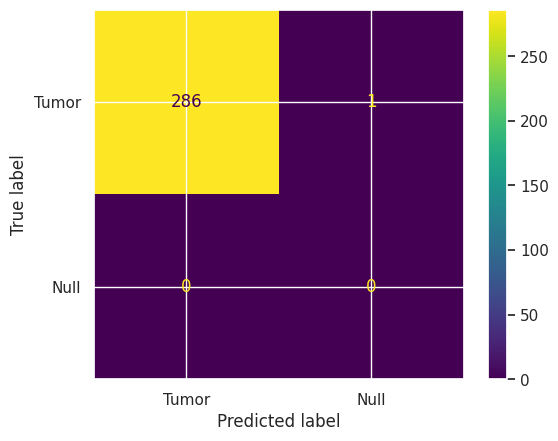

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os


def generate_confusion_matrix(df):
    y_true = df['y_true'].values
    y_pred = df['y_pred'].values
    return confusion_matrix(y_true, y_pred)

predictions = pd.read_json('runs/detect/val5/predictions.json')

source = '/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels'

y_true_list = []
y_pred_list = predictions['category_id'].to_list()

for filename in os.listdir(source):
    labels = np.loadtxt(os.path.join(f"{source}", filename))
    y_true_list.append(int(labels[0]))

dif = len(y_true_list) -len(y_pred_list)


for i in range(dif):
    y_pred_list.append(1)


df = pd.DataFrame({"y_true":y_true_list,"y_pred":y_pred_list})

print(df)
print(generate_confusion_matrix(df))
disp = ConfusionMatrixDisplay(generate_confusion_matrix(df), display_labels=['Tumor','Null'])
disp.plot()
disp.figure_.savefig(f"{path_model}/brute_confusion_matrix.png")


In [ ]:
#validação
from ultralytics import YOLO
models_paths = ['/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m','/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L','/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X','/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n','/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s']

for model_path in models_paths:
  print(model_path)
  model = YOLO(f"{model_path}/weights/best.pt")  # load a custom model
  metrics = model.val(data='/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data.yaml',max_det=2)




Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.71it/s]
                   all        287        287      0.989      0.985      0.993      0.735
Speed: 1.7ms pre-process, 21.9ms inference, 0.0ms loss, 1.5ms post-process per image


/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]
                   all        287        287      0.982      0.976      0.994      0.731
Speed: 1.9ms pre-process, 37.4ms inference, 0.0ms loss, 2.5ms post-process per image


/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]
                   all        287        287          1      0.988      0.995      0.731
Speed: 3.2ms pre-process, 59.7ms inference, 0.0ms loss, 1.4ms post-process per image
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n


Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.69it/s]
                   all        287        287      0.996      0.985      0.994      0.718
Speed: 1.9ms pre-process, 5.1ms inference, 0.0ms loss, 2.0ms post-process per image
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.96it/s]
                   all        287        287      0.937       0.88      0.938      0.667
Speed: 2.8ms pre-process, 9.8ms inference, 0.0ms loss, 3.0ms post-process per image
